# Analyst Name:
# Pragadeesh Govindaraj 

# Data Preprocessing 

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.metrics import roc_auc_score
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [29]:
# Read data from sheets
champo_raw = pd.read_excel('System Analytics Project 1 Data.xlsx', sheet_name=1)
champo_sample_only = pd.read_excel('System Analytics Project 1 Data.xlsx', sheet_name=3)
champo_cluster = pd.read_excel('System Analytics Project 1 Data.xlsx', sheet_name=5)
champo_rec = pd.read_excel('System Analytics Project 1 Data.xlsx', sheet_name=4)

In [30]:
champo_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18955 entries, 0 to 18954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderType        18955 non-null  object        
 1   OrderCategory    18955 non-null  object        
 2   CustomerCode     18955 non-null  object        
 3   CountryName      18955 non-null  object        
 4   CustomerOrderNo  18946 non-null  object        
 5   Custorderdate    18955 non-null  datetime64[ns]
 6   UnitName         18955 non-null  object        
 7   QtyRequired      18955 non-null  int64         
 8   TotalArea        18955 non-null  float64       
 9   Amount           18955 non-null  float64       
 10  ITEM_NAME        18955 non-null  object        
 11  QualityName      18955 non-null  object        
 12  DesignName       18955 non-null  object        
 13  ColorName        18955 non-null  object        
 14  ShapeName        18955 non-null  objec

In [31]:
champo_raw.head()

OrderType OrderCategory CustomerCode CountryName CustomerOrderNo  \
0  Area Wise         Order          H-1         USA         1873354   
1  Area Wise         Order          H-1         USA         1873354   
2  Area Wise         Order          H-1         USA         1873354   
3  Area Wise         Order          H-1         USA         1918436   
4  Area Wise         Order          H-1         USA         1873354   

  Custorderdate UnitName  QtyRequired  TotalArea  Amount    ITEM_NAME  \
0    2017-01-16       Ft            2       6.00   12.00  HAND TUFTED   
1    2017-01-16       Ft            2       9.00   18.00  HAND TUFTED   
2    2017-01-16       Ft            2      54.00  108.00  HAND TUFTED   
3    2017-02-01       Ft            5      54.00  270.00  HAND TUFTED   
4    2017-01-16       Ft            5      71.25  356.25  HAND TUFTED   

             QualityName         DesignName ColorName ShapeName  AreaFt  
0  TUFTED 30C HARD TWIST  OLD LONDON [3715]     BEIGE       REC    6.00  
1  TUFTED 30C HARD TWIST  OLD LONDON [3715]     BEIGE       REC    9.00  
2  TUFTED 30C HARD TWIST  OLD LONDON [3715]     BEIGE       REC   54.00  
3  TUFTED 30C HARD TWIST  OLD LONDON [3715]     BEIGE       REC   54.00  
4  TUFTED 30C HARD TWIST  OLD LONDON [3715]     BEIGE       REC   71.25

In [32]:
champo_sample_only.head()

CustomerCode CountryName  USA   UK  Italy  Belgium  Romania  Australia  \
0           CC       INDIA  0.0  0.0    0.0      0.0      0.0        0.0   
1          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
2          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
3          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   
4          M-1         USA  1.0  0.0    0.0      0.0      0.0        0.0   

   India  QtyRequired  ... Knotted  Jacquard  Handloom  Other  ShapeName  REC  \
0    1.0            1  ...       0         0         0      0        REC    1   
1    0.0            1  ...       0         0         0      0        REC    1   
2    0.0            2  ...       0         0         0      0        REC    1   
3    0.0            1  ...       0         0         0      0        REC    1   
4    0.0            1  ...       0         0         0      0        REC    1   

   Round  Square  AreaFt Order Conversion  
0      0       0    80.0                1  
1      0       0    80.0                1  
2      0       0    80.0                1  
3      0       0    80.0                1  
4      0       0    80.0                1  

[5 rows x 25 columns]

In [33]:
# Removing unwanted columns
champo_raw.drop(['CustomerOrderNo', 'UnitName'], axis=1, inplace=True)

The Customer Order No and Unit Name have no inlfuence on determining the Order
Conversion rate and hence we have disregarded the variables.

# Outlier Test

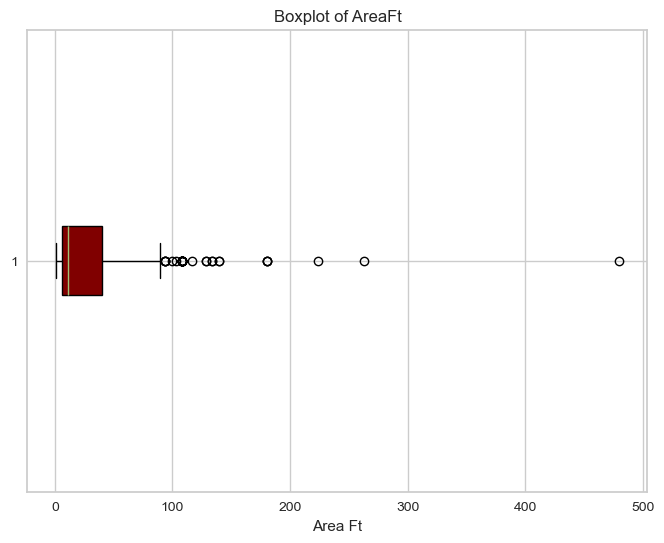

In [34]:
plt.figure(figsize=(8, 6))
plt.boxplot(champo_sample_only['AreaFt'], vert=False, patch_artist=True, boxprops=dict(facecolor='maroon'))
plt.xlabel('Area Ft')
plt.title('Boxplot of AreaFt')
plt.show() # Adjust the threshold as needed

In [35]:
# Columns to be removed
columns_to_remove = ['USA', 'UK', 'Italy', 'Belgium', 'Romania', 'Australia', 'India',
                     'Hand Tufted', 'Durry', 'Double Back', 'Hand Woven', 'Knotted',
                     'Jacquard', 'Handloom', 'Other', 'REC', 'Round', 'Square']

# Removing unwanted columns
champo_sample_only.drop(columns=columns_to_remove, inplace=True)

We discarded the variables since the attributes of the nations we deleted were essentially repetitious binary values of the previously stated CountryName, ITEM_NAME, and ShapeName variables.

In [36]:
# Replace specific values in ITEM_NAME column
champo_raw['ITEM_NAME'].replace({"INDO-TIBBETAN": "INDO TIBBETAN"}, inplace=True)

# Remove rows where ITEM_NAME is "-"
champo_raw = champo_raw[champo_raw['ITEM_NAME'] != "-"]

# Replace specific values in ITEM_NAME column in champo_sample_only
champo_sample_only['ITEM_NAME'].replace({"INDO-TIBBETAN": "INDO TIBBETAN"}, inplace=True)

A small number of rows in the ITEM_NAME property on the Raw Data Order and Sample & Data on Sample ONLY sheets contained values that were hypenated. As a result, we treated those rows using their genuine values.

### Converting data type to Categorical in Raw Data Order and Sample sheet & Data on Sample ONLY sheet

In [37]:
# List of column names for champo_raw
champo_raw_names = ['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName', 'ITEM_NAME',
                    'QualityName', 'DesignName', 'ColorName', 'ShapeName']

# Convert specified columns to categorical in champo_raw
champo_raw[champo_raw_names] = champo_raw[champo_raw_names].apply(lambda x: x.astype('category'))

# List of column names for champo_sample_only
champo_sample_only_names = ['CustomerCode', 'CountryName', 'ITEM_NAME', 'ShapeName', 'Order Conversion']

# Convert specified columns to categorical in champo_sample_only
champo_sample_only[champo_sample_only_names] = champo_sample_only[champo_sample_only_names].apply(lambda x: x.astype('category'))

### Renaming the Target Variable in Data on Sample ONLY

In [38]:
# Rename column in champo_sample_only
champo_sample_only.rename(columns={'Order Conversion': 'Order_Conversion'}, inplace=True)

# Rename column in champo_cluster
champo_cluster.rename(columns={champo_cluster.columns[0]: 'Rowlabels'}, inplace=True)

### Missing Value Analysis - Raw Data Order and Sample & Data on Sample ONLY

In [39]:
# Column-wise count of missing values in champo_raw
missing_values_raw = champo_raw.isna().sum()
print("champo_raw:")
print(missing_values_raw)

# Column-wise count of missing values in champo_sample_only
missing_values_sample_only = champo_sample_only.isna().sum()
print("\nchampo_sample_only:")
print(missing_values_sample_only)

champo_raw:
OrderType        0
OrderCategory    0
CustomerCode     0
CountryName      0
Custorderdate    0
QtyRequired      0
TotalArea        0
Amount           0
ITEM_NAME        0
QualityName      0
DesignName       0
ColorName        0
ShapeName        0
AreaFt           0
dtype: int64

champo_sample_only:
CustomerCode        0
CountryName         0
QtyRequired         0
ITEM_NAME           0
ShapeName           0
AreaFt              0
Order_Conversion    0
dtype: int64


### Summary Statistics of Dataset variables - Raw Data Order and Sample & Data on Sample ONLY

In [40]:
# Summary statistics for champo_raw
print("Summary Statistics of Raw Data Order and Sample")
print(champo_raw.describe(include='all'))

# Summary statistics for champo_sample_only
print("\nSummary Statistics of Data on Sample ONLY")
print(champo_sample_only.describe(include='all'))

# For specific columns, you can also use value_counts
print("\nFrequency of ITEM_NAME in champo_raw:")
print(champo_raw['ITEM_NAME'].value_counts())

print("\nFrequency of ITEM_NAME in champo_sample_only:")
print(champo_sample_only['ITEM_NAME'].value_counts())

Summary Statistics of Raw Data Order and Sample
        OrderType OrderCategory CustomerCode CountryName        Custorderdate  \
count       18951         18951        18951       18951                18951   
unique          2             2           46          15                  776   
top     Area Wise         Order           CC         USA  2018-12-19 00:00:00   
freq        14202         13131         4135       10624                  201   
first         NaN           NaN          NaN         NaN  2017-01-16 00:00:00   
last          NaN           NaN          NaN         NaN  2020-02-14 00:00:00   
mean          NaN           NaN          NaN         NaN                  NaN   
std           NaN           NaN          NaN         NaN                  NaN   
min           NaN           NaN          NaN         NaN                  NaN   
25%           NaN           NaN          NaN         NaN                  NaN   
50%           NaN           NaN          NaN         NaN     

### Data Quality Check for Raw Data Order and Sample & Data on Sample ONLY

In [41]:
# Display data quality summary
data_qual = champo_raw.describe(include='all').T
data_qual.columns = ["Values"] * len(data_qual.columns)
display(data_qual)

Values Values               Values Values     Values  \
OrderType        18951      2            Area Wise  14202        NaT   
OrderCategory    18951      2                Order  13131        NaT   
CustomerCode     18951     46                   CC   4135        NaT   
CountryName      18951     15                  USA  10624        NaT   
Custorderdate    18951    776  2018-12-19 00:00:00    201 2017-01-16   
QtyRequired    18951.0    NaN                  NaN    NaN        NaT   
TotalArea      18951.0    NaN                  NaN    NaN        NaT   
Amount         18951.0    NaN                  NaN    NaN        NaT   
ITEM_NAME        18951     11          HAND TUFTED   7095        NaT   
QualityName      18951    381           TUFTED 60C   1319        NaT   
DesignName       18951   2254                PLAIN    819        NaT   
ColorName        18951    815                 GREY   1334        NaT   
ShapeName        18951      5                  REC  18514        NaT   
AreaFt         18951.0    NaN                  NaN    NaN        NaT   

                  Values       Values        Values  Values  Values Values  \
OrderType            NaT          NaN           NaN     NaN     NaN    NaN   
OrderCategory        NaT          NaN           NaN     NaN     NaN    NaN   
CustomerCode         NaT          NaN           NaN     NaN     NaN    NaN   
CountryName          NaT          NaN           NaN     NaN     NaN    NaN   
Custorderdate 2020-02-14          NaN           NaN     NaN     NaN    NaN   
QtyRequired          NaT    31.416073    191.469897     1.0     1.0    4.0   
TotalArea            NaT     36.15421     45.173331    0.04     4.0   15.0   
Amount               NaT  1657.923076  14056.391141     0.0     0.0  201.0   
ITEM_NAME            NaT          NaN           NaN     NaN     NaN    NaN   
QualityName          NaT          NaN           NaN     NaN     NaN    NaN   
DesignName           NaT          NaN           NaN     NaN     NaN    NaN   
ColorName            NaT          NaN           NaN     NaN     NaN    NaN   
ShapeName            NaT          NaN           NaN     NaN     NaN    NaN   
AreaFt               NaT    44.471027      45.21222  0.4444  8.4375   35.0   

                Values     Values  
OrderType          NaN        NaN  
OrderCategory      NaN        NaN  
CustomerCode       NaN        NaN  
CountryName        NaN        NaN  
Custorderdate      NaN        NaN  
QtyRequired       13.0     6400.0  
TotalArea         54.0     1024.0  
Amount         979.425  599719.68  
ITEM_NAME          NaN        NaN  
QualityName        NaN        NaN  
DesignName         NaN        NaN  
ColorName          NaN        NaN  
ShapeName          NaN        NaN  
AreaFt         64.7361   645.7222

In [42]:
data_qual = champo_sample_only.describe(include='all').T
data_qual.columns = ["Values"] * len(data_qual.columns)
display(data_qual)

Values Values       Values  Values     Values     Values  \
CustomerCode        5820     34           CC    3941        NaN        NaN   
CountryName         5820     14        INDIA    3941        NaN        NaN   
QtyRequired       5820.0    NaN          NaN     NaN   1.974914   5.683137   
ITEM_NAME           5820     11  HAND TUFTED    2425        NaN        NaN   
ShapeName           5820      3          REC    5741        NaN        NaN   
AreaFt            5820.0    NaN          NaN     NaN  21.555815  21.548281   
Order_Conversion  5820.0    2.0          0.0  4651.0        NaN        NaN   

                  Values Values Values   Values Values  
CustomerCode         NaN    NaN    NaN      NaN    NaN  
CountryName          NaN    NaN    NaN      NaN    NaN  
QtyRequired          1.0    1.0    1.0      1.0  200.0  
ITEM_NAME            NaN    NaN    NaN      NaN    NaN  
ShapeName            NaN    NaN    NaN      NaN    NaN  
AreaFt            0.6667    6.0   11.0  39.8125  480.0  
Order_Conversion     NaN    NaN    NaN      NaN    NaN

# Exploratory Data Analysis

#### Computing Proportion of Order Conversion Rate:

AttributeError: 'int' object has no attribute 'startswith'

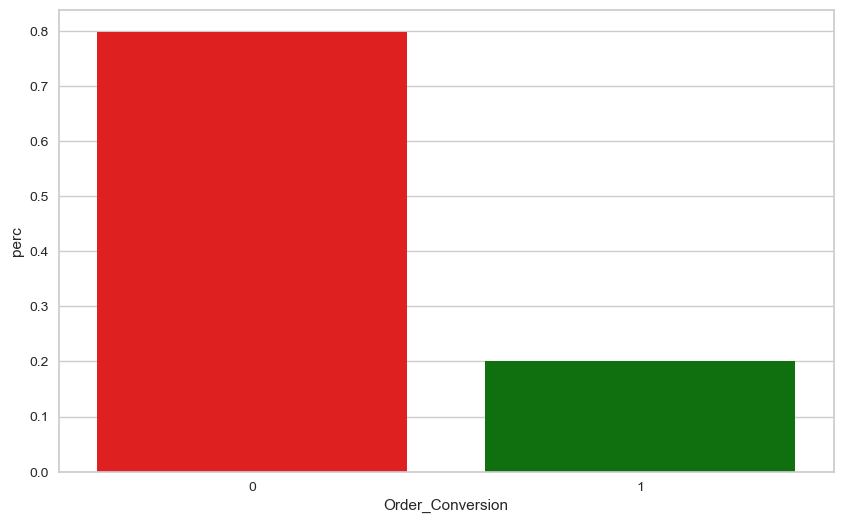

In [56]:
# Calculate counts and percentages
response = champo_sample_only['Order_Conversion'].value_counts().reset_index()
response.columns = ['Order_Conversion', 'count']
response['perc'] = response['count'] / len(champo_sample_only)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Conversion', y='perc', data=response, hue='Order_Conversion',
            palette={1: 'green', 0: 'red'}, dodge=False)
plt.title('Percentage of Order Conversion Rate')
plt.xlabel('Order Conversion')
plt.ylabel('Percentage')
plt.xticks(ticks=[0, 1], labels=['0 - Not Converted', '1 - Converted'])
plt.legend(title='Order Conversion', labels=['0', '1'])

# Display percentage labels on the bars
for index, value in enumerate(response['perc']):
    plt.text(index, value + 0.01, f'{value:.1%}', ha='center', va='bottom')

plt.show()

We see a bias in the Order Conversion Rate result towards a larger percentage of No Conversion Rate. Merely 20% of the 5820 clients have a decent prospective conversion rate, and almost 80% of them do not return as potential buyers for Champo Carpets.As a result, we may state that the information is imbalanced.

#### Key Insights Order Count Charts - Computing the Count of Orders across all the years

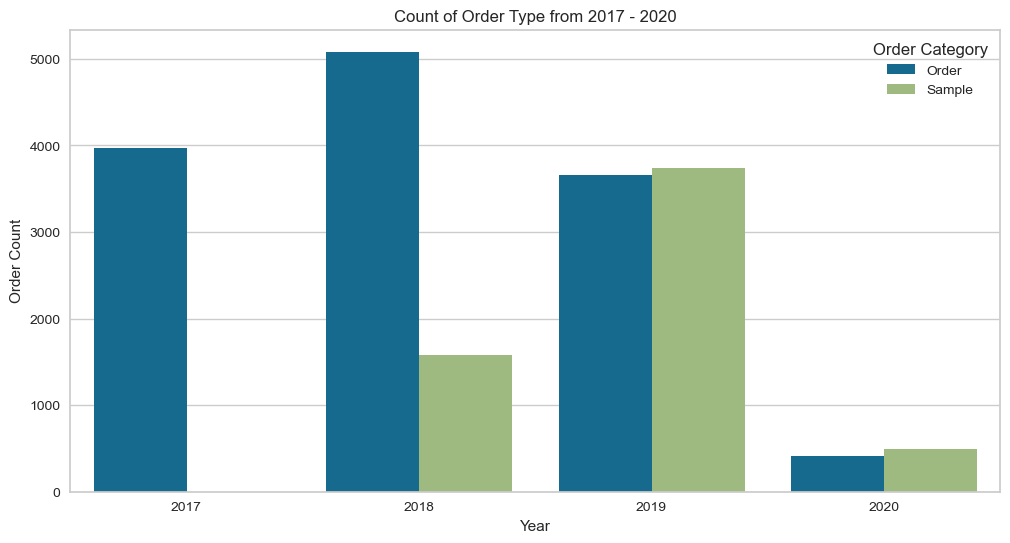

In [57]:
# Convert Custorderdate to datetime
champo_raw['Custorderdate'] = pd.to_datetime(champo_raw['Custorderdate'])

# Create a new column 'OrderYear'
champo_raw['OrderYear'] = champo_raw['Custorderdate'].dt.year.astype(str)

# Group by OrderYear and OrderCategory, calculate Order_Count
order_counts = champo_raw.groupby(['OrderYear', 'OrderCategory']).size().reset_index(name='Order_Count')

# Plot the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='OrderYear', y='Order_Count', hue='OrderCategory', data=order_counts)
plt.title('Count of Order Type from 2017 - 2020')
plt.xlabel('Year')
plt.ylabel('Order Count')
plt.legend(title='Order Category')

plt.show()

We may deduce from the bar plot that 2017 and 2018 had a higher number of orders.
 However, there are a lot more samples as we go from 2018 to 2020. Compared to other years, the overall order quantity in 2020 is incredibly low.

#### Order And Sample - Computing the Count of Orders by Item Types

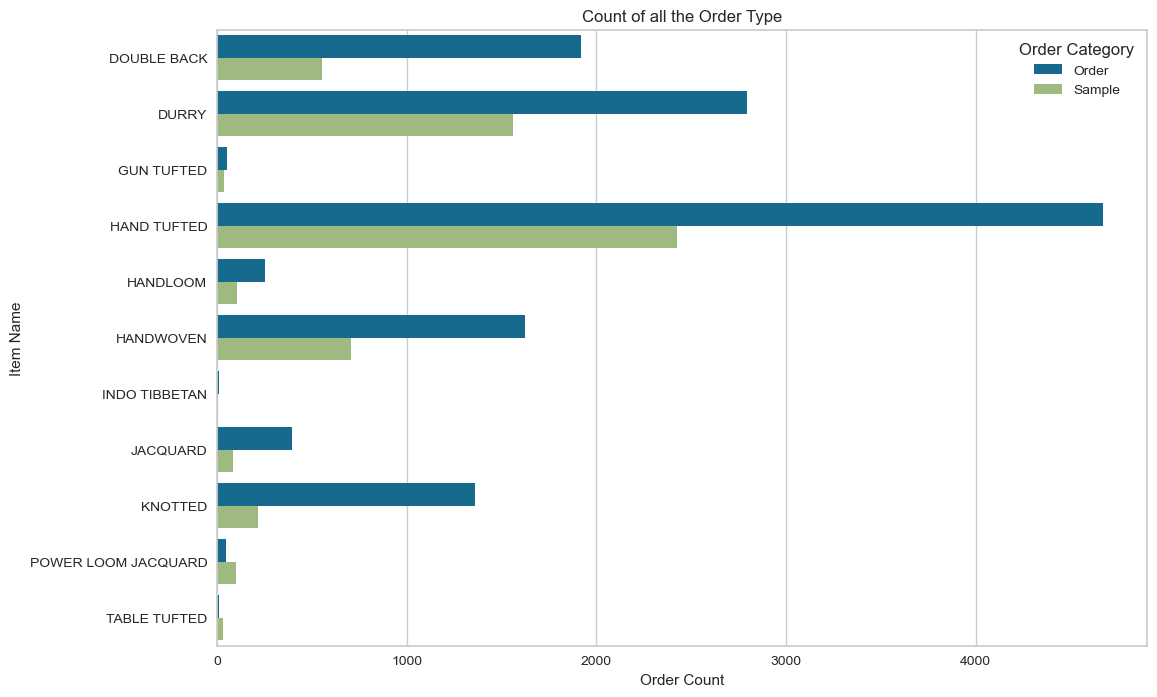

In [58]:
# Group by ITEM_NAME and OrderCategory, calculate Order_Count
item_order_counts = champo_raw.groupby(['ITEM_NAME', 'OrderCategory']).size().reset_index(name='Order_Count')

# Plot the bar chart with horizontal bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Order_Count', y='ITEM_NAME', hue='OrderCategory', data=item_order_counts, orient='h')
plt.title('Count of all the Order Type')
plt.xlabel('Order Count')
plt.ylabel('Item Name')
plt.legend(title='Order Category')

plt.show()

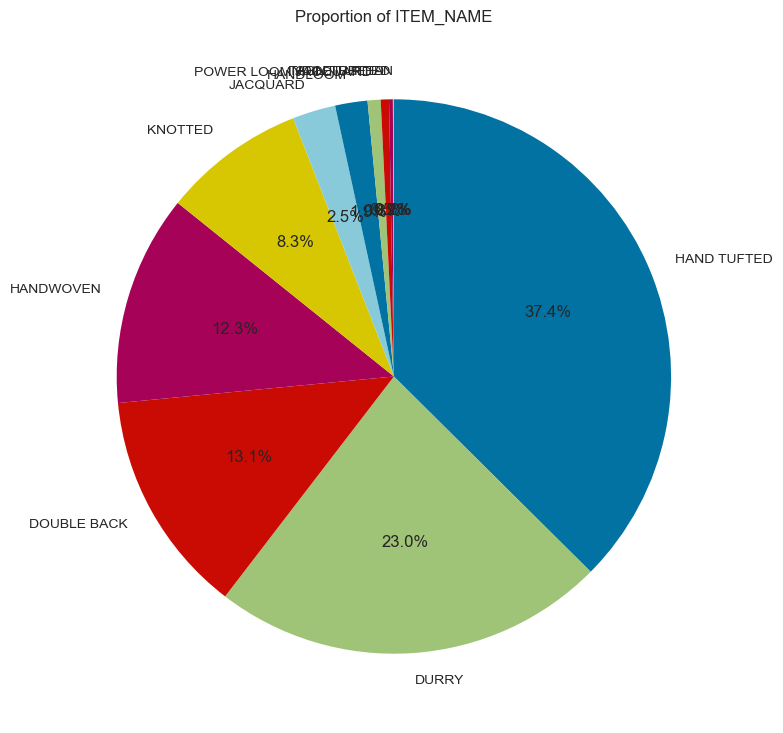

In [59]:
# Create a table of counts for ITEM_NAME
proportion_table = champo_raw['ITEM_NAME'].value_counts()

# Plot a pie chart
plt.figure(figsize=(9, 9))
plt.pie(proportion_table, labels=proportion_table.index, autopct='%1.1f%%', startangle=90, counterclock=False, labeldistance=1.1)
plt.title('Proportion of ITEM_NAME')
plt.show()

We may deduce that the item type with the largest quantity of orders is "Hand Tufted," followed by "Durry," "Double Back," and "Handwoven." The "Indo Tibetan" type item is the least sorted. We note a noteworthy downward trend in the Order and Sample categories. Orders were lower than samples for only two item types: "Table Tufted" and "Power Loom Jacquard."

#### Counting the Quantity Required by Item Type

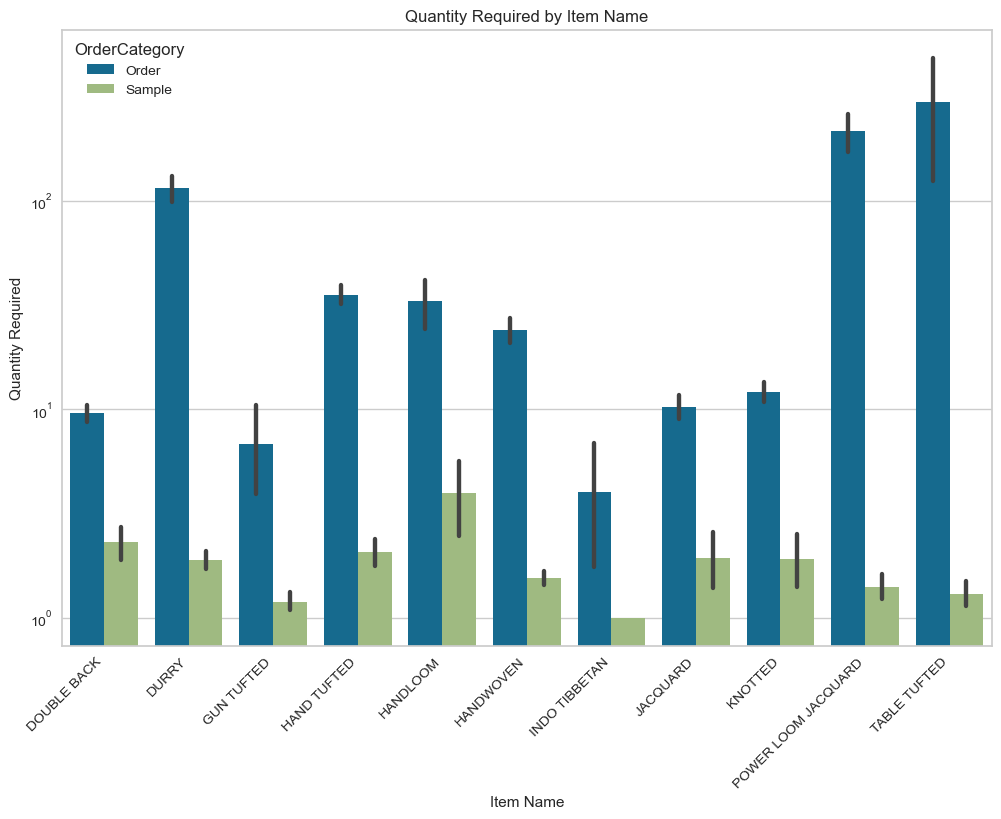

In [60]:
# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='ITEM_NAME', y='QtyRequired', hue='OrderCategory',
            data=champo_raw.sort_values('QtyRequired', ascending=False))
plt.xticks(rotation=45, ha='right')
plt.title('Quantity Required by Item Name')
plt.xlabel('Item Name')
plt.ylabel('Quantity Required')
plt.yscale('log')  # Use log scale for better visualization of varying quantities
plt.show()

The bar plot suggests that the item category with the largest order quantity is "Durry," followed by "Hand Tufted" and "Handwoven." In comparison to the entire quantity needed, we find that there is a noticeably lower demand for the samples.

#### Revenue - Revenue computation by Countries

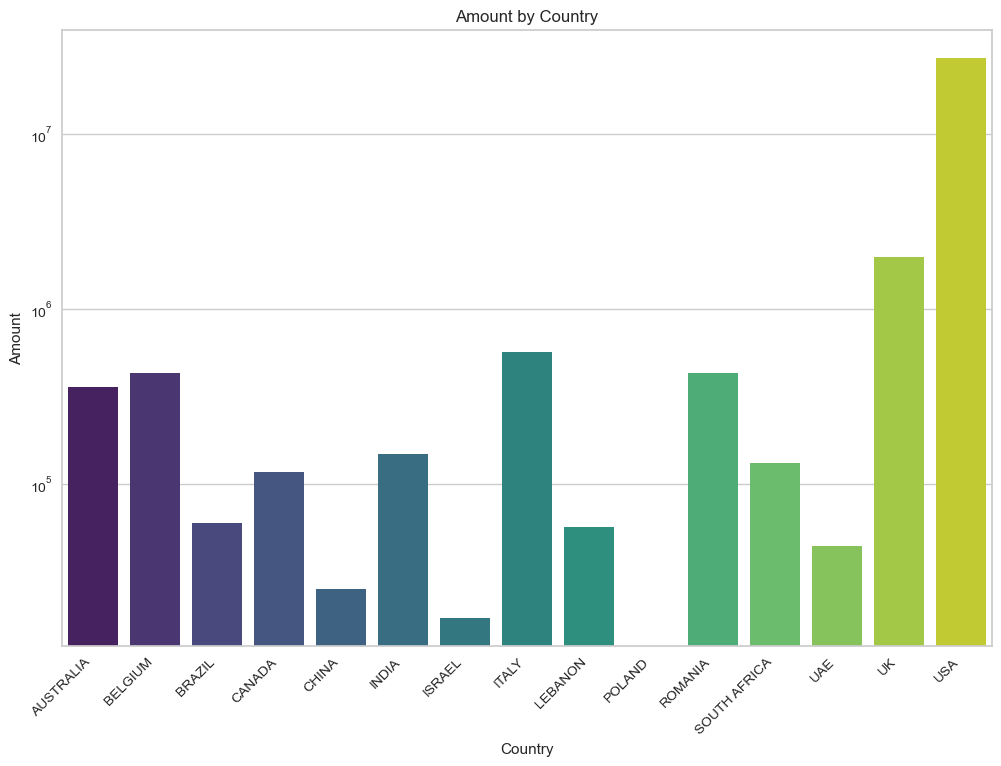

In [61]:
# Group by CountryName and calculate the sum of Amount for each country
country_amount_sum = champo_raw.groupby('CountryName')['Amount'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='CountryName', y='Amount', data=country_amount_sum, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Amount by Country')
plt.xlabel('Country')
plt.ylabel('Amount')
plt.yscale('log')  # Use log scale for better visualization of varying amounts
plt.show()

#### Revenue computation by Item Type

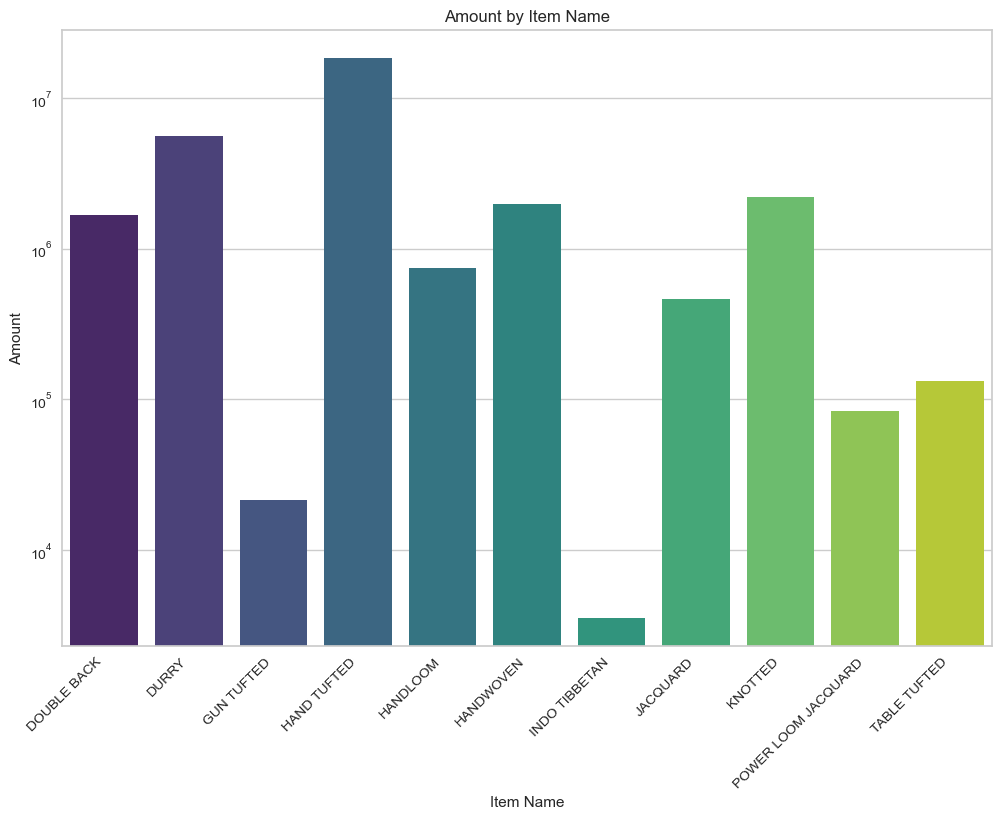

In [62]:
# Group by ITEM_NAME and calculate the sum of Amount for each item
item_amount_sum = champo_raw.groupby('ITEM_NAME')['Amount'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='ITEM_NAME', y='Amount', data=item_amount_sum, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Amount by Item Name')
plt.xlabel('Item Name')
plt.ylabel('Amount')
plt.yscale('log')  # Use log scale for better visualization of varying amounts
plt.show()

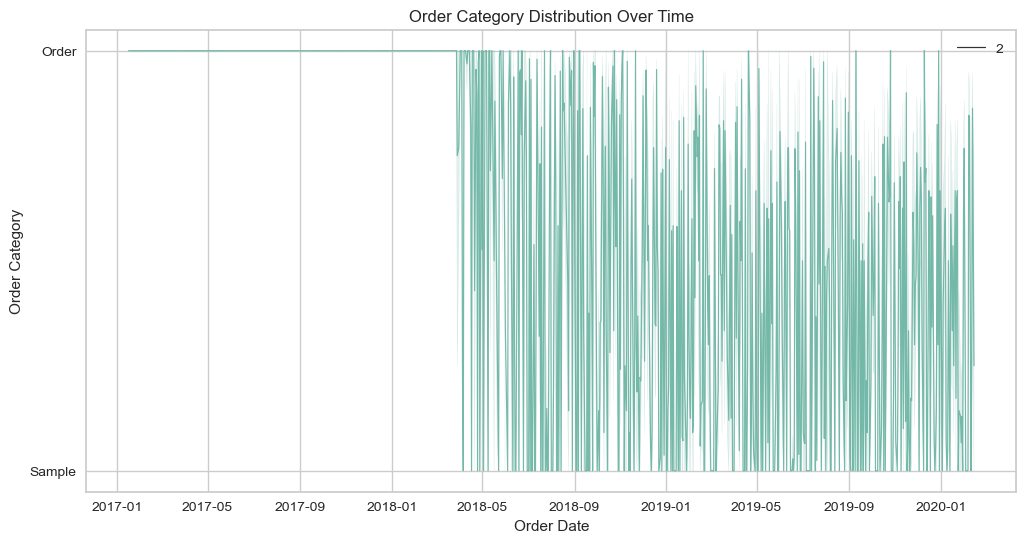

In [50]:
# Plotting the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Custorderdate', y='OrderCategory', data=champo_raw, color="#69b3a2", size=2, alpha=0.9, linestyle='-', linewidth=1.5)

# Formatting the plot
plt.title('Order Category Distribution Over Time')
plt.xlabel('Order Date')
plt.ylabel('Order Category')
plt.show()

#### Revenue computation by Companies

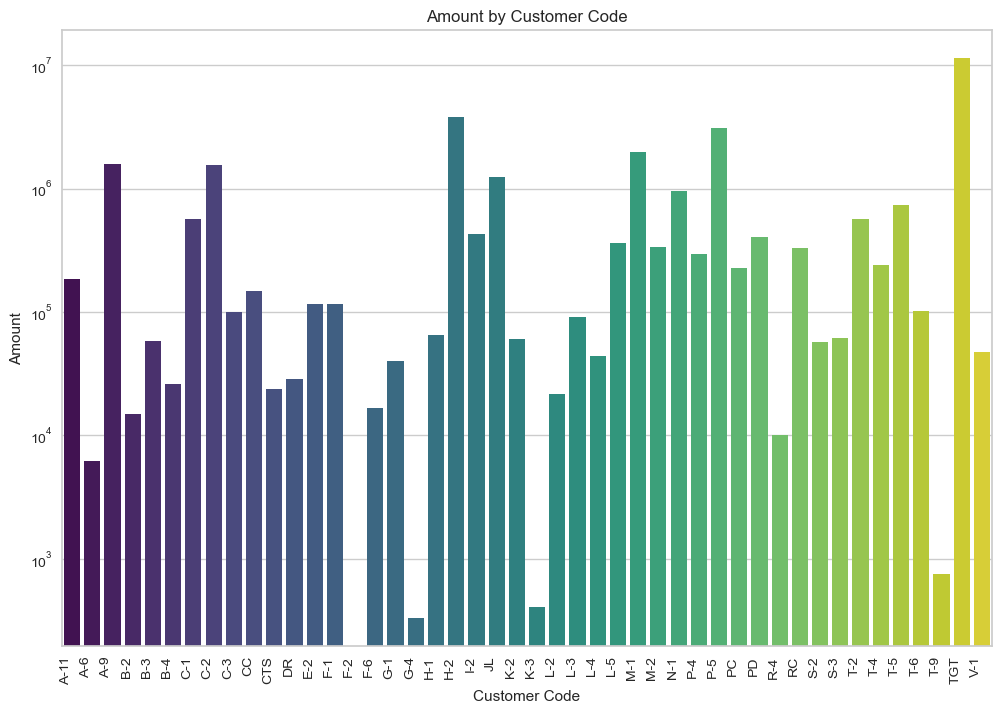

In [63]:
# Group by CustomerCode and calculate the sum of Amount for each customer
customer_amount_sum = champo_raw.groupby('CustomerCode')['Amount'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='CustomerCode', y='Amount', data=customer_amount_sum, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Amount by Customer Code')
plt.xlabel('Customer Code')
plt.ylabel('Amount')
plt.yscale('log')  # Use log scale for better visualization of varying amounts
plt.show()

#### Revenue computation by Shape Type

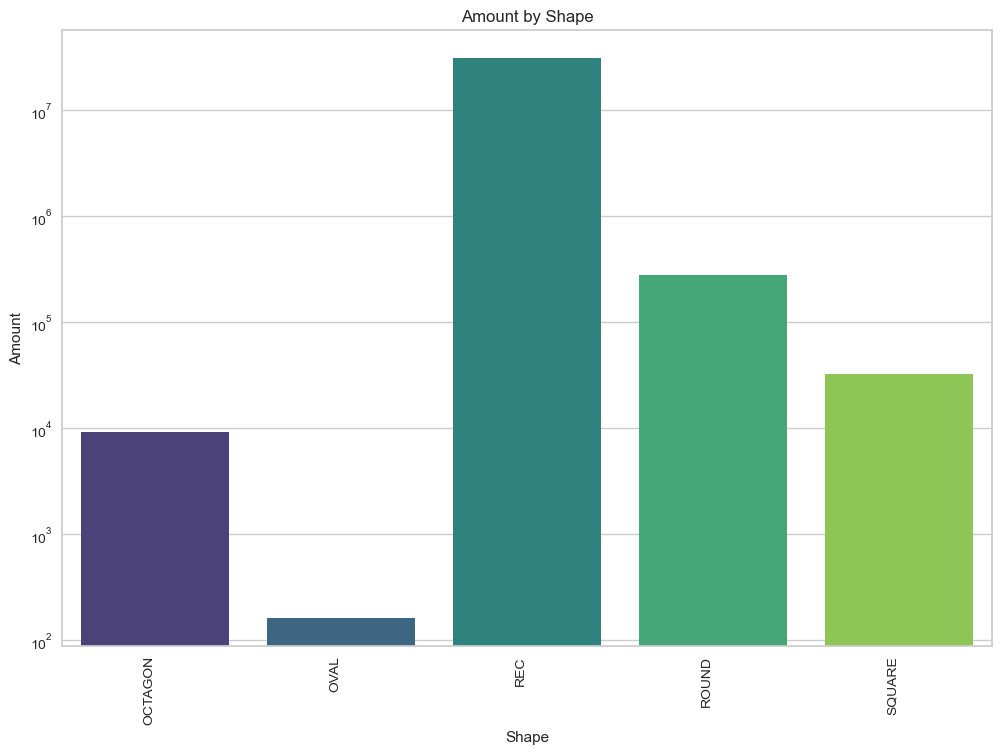

In [64]:
# Group by ShapeName and calculate the sum of Amount for each shape
shape_amount_sum = champo_raw.groupby('ShapeName')['Amount'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='ShapeName', y='Amount', data=shape_amount_sum, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Amount by Shape')
plt.xlabel('Shape')
plt.ylabel('Amount')
plt.yscale('log')  # Use log scale for better visualization of varying amounts
plt.show()

The Bar Plots above suggest that the United States of America is the country with the highest revenue generation relative to all other nations. Additionally, the item kinds that generate the most money are "Hand Tufted," "Durry," "Knotted," and "Handwoven," whereas the item types that generate the least revenue are "Gun Tufted" and "Indo Tibetan." In a similar vein, sales to TGT Company generate a substantially larger revenue than H-2 and P-5. The most profitable carpet shapes are rectangular, followed by round and square rugs, in that order.

#### Order Conversion - Computing Count of Order Conversion per Country

AttributeError: 'int' object has no attribute 'startswith'

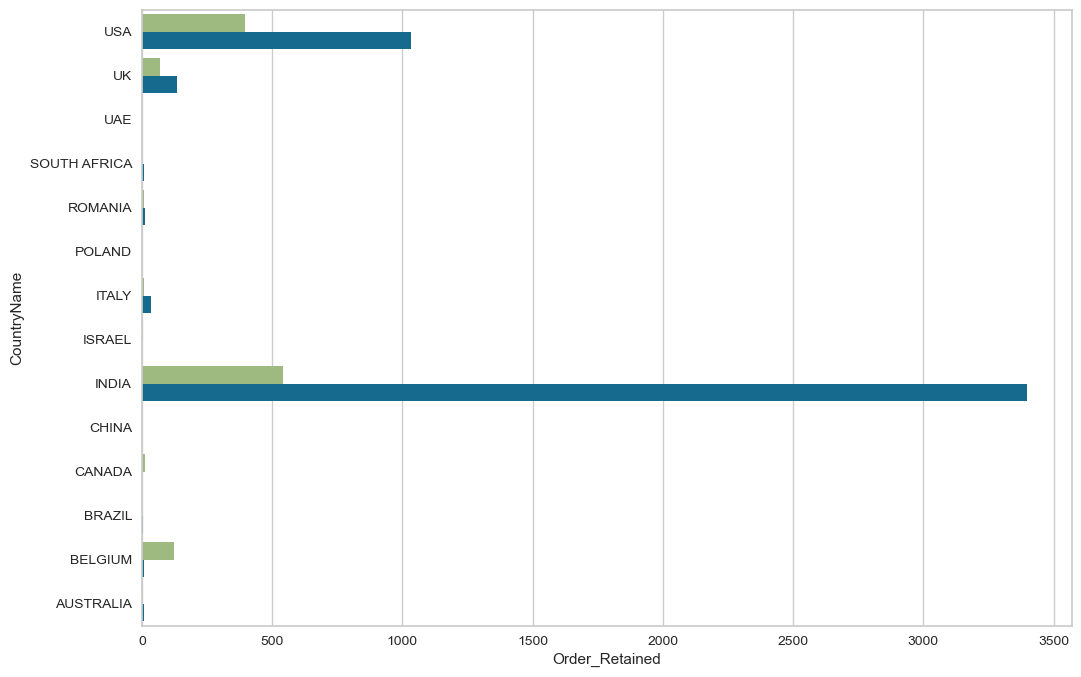

In [65]:
# Group by CountryName and Order_Conversion, calculate Order_Retained
country_order_retained = champo_sample_only.groupby(['CountryName', 'Order_Conversion']).size().reset_index(name='Order_Retained')

# Plot the bar chart with horizontal bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Order_Retained', y='CountryName', hue='Order_Conversion',
            data=country_order_retained.sort_values('Order_Retained', ascending=False), orient='h')
plt.title('Count of Order Conversion per Country')
plt.xlabel('Order Retained')
plt.ylabel('Country Names')
plt.legend(title='Order Conversion', labels=['0 - Not Converted', '1 - Converted'])
plt.show()

India has the largest order conversion count among all the countries, followed by the United States and the United Kingdom, based on the bar plot. When it comes to orders that haven't been converted, Belgium and Canada have the greatest retention rates.

#### Computing Count of Order Conversion per Company

AttributeError: 'int' object has no attribute 'startswith'

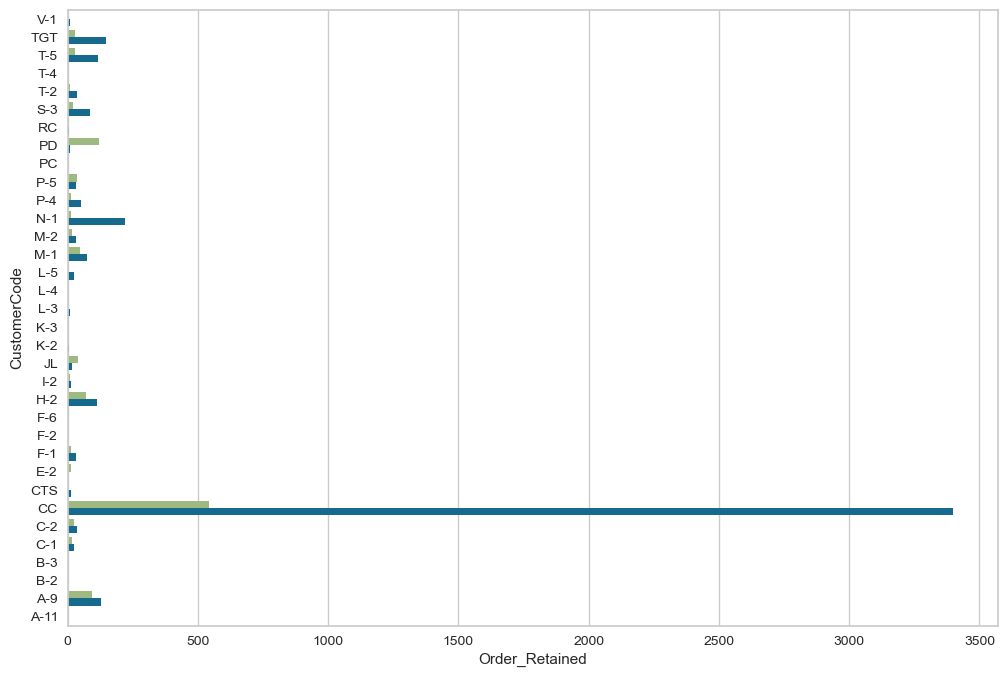

In [54]:
# Group by CustomerCode and Order_Conversion, calculate Order_Retained
company_order_retained = champo_sample_only.groupby(['CustomerCode', 'Order_Conversion']).size().reset_index(name='Order_Retained')

# Plot the bar chart with horizontal bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Order_Retained', y='CustomerCode', hue='Order_Conversion',
            data=company_order_retained.sort_values('Order_Retained', ascending=False), orient='h')
plt.title('Count of Order Conversion per Company')
plt.xlabel('Order Retained')
plt.ylabel('Company Code')
plt.legend(title='Order Conversion', labels=['0 - Not Converted', '1 - Converted'])
plt.show()

Comparably, CC Company outperforms all other companies in terms of order conversion. In contrast to the orders that were not converted, we can see that the "PD," "JL," "E-2," and "F-6" firms had the greatest sample retention rates.

#### Computing Count of Order Conversion per Item Type

AttributeError: 'int' object has no attribute 'startswith'

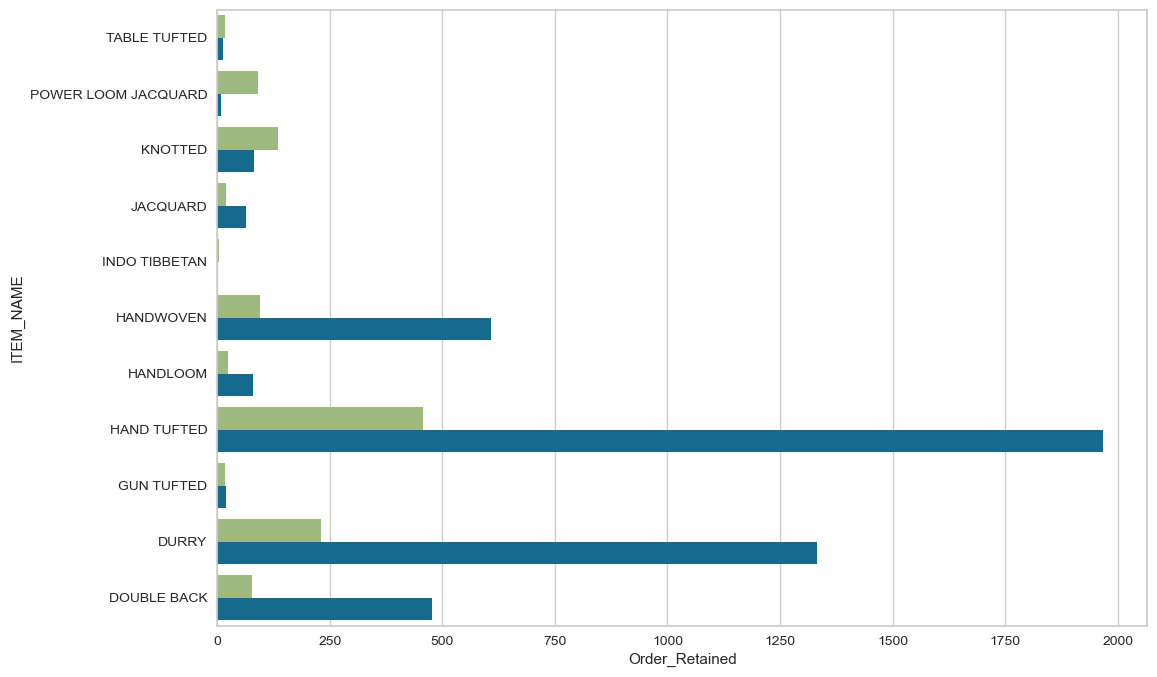

In [55]:
# Group by ITEM_NAME and Order_Conversion, calculate Order_Retained
item_order_retained = champo_sample_only.groupby(['ITEM_NAME', 'Order_Conversion']).size().reset_index(name='Order_Retained')

# Plot the bar chart with horizontal bars
plt.figure(figsize=(12, 8))
sns.barplot(x='Order_Retained', y='ITEM_NAME', hue='Order_Conversion',
            data=item_order_retained.sort_values('Order_Retained', ascending=False), orient='h')
plt.title('Count of Order Conversion per Item Type')
plt.xlabel('Order Retained')
plt.ylabel('Item Type')
plt.legend(title='Order Conversion', labels=['0 - Not Converted', '1 - Converted'])
plt.show()

The sample retention rate of "Hand Tufted" is much lower than that of "Durry," "Hand Woven," and "Double Back," with the greatest order conversion. In contrast, the item types labelled as "Knotted" and "Power Loom Jacquard" have the highest sample retention rates.

#### Analysis of Continuous Variables in Data on Sample ONLY sheet

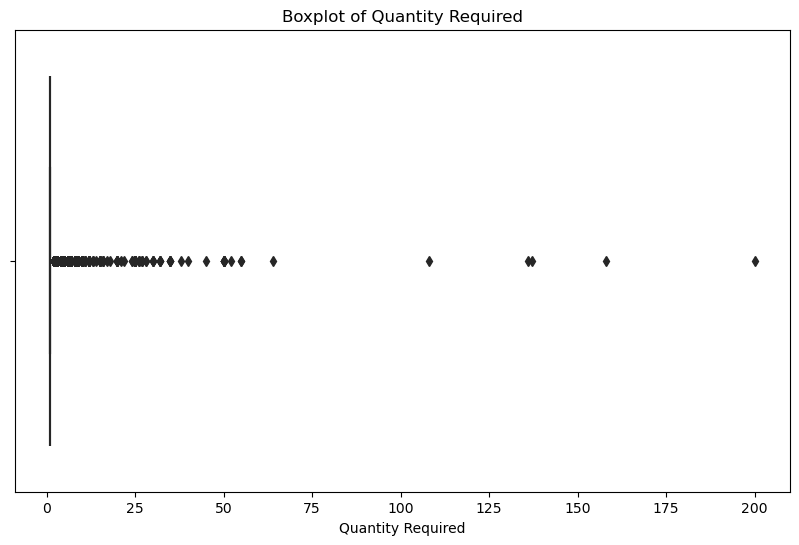

In [29]:
# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=champo_sample_only['QtyRequired'], color='maroon')
plt.xlabel('Quantity Required')
plt.title('Boxplot of Quantity Required')
plt.show()

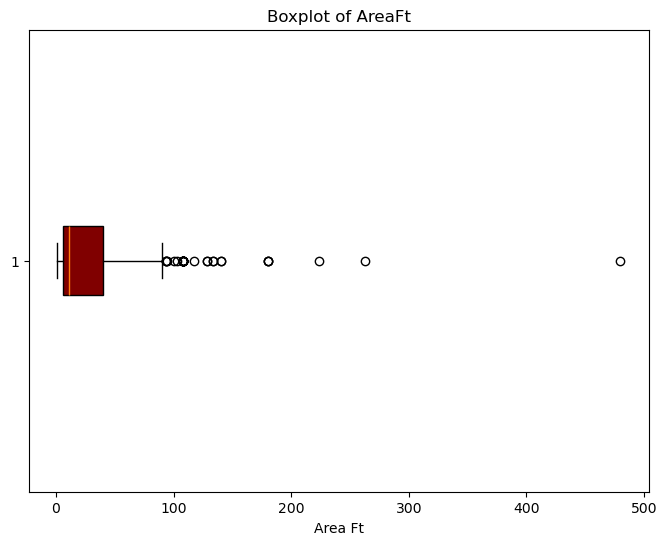

In [30]:
# Plotting a boxplot for the 'AreaFt' column
plt.figure(figsize=(8, 6))
plt.boxplot(champo_sample_only['AreaFt'], vert=False, patch_artist=True, boxprops=dict(facecolor='maroon'))
plt.xlabel('Area Ft')
plt.title('Boxplot of AreaFt')
plt.show()

#### Variables in Data on Sample ONLY sheet

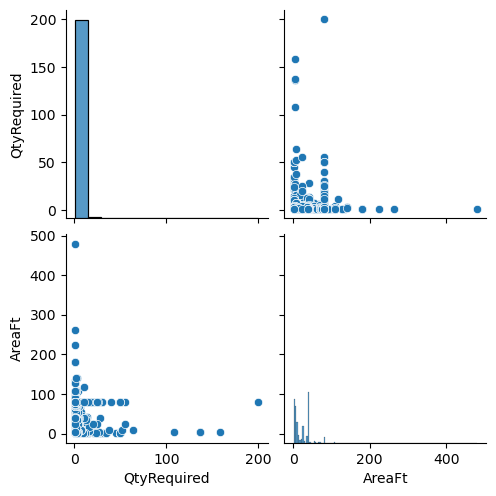

In [31]:
# Selecting relevant columns
corr_cols = ['QtyRequired', 'AreaFt', 'Order_Conversion']
corr_data = champo_sample_only[corr_cols]

# Plotting a pairplot
sns.pairplot(corr_data)
plt.show()

#### Computing the correlation between numerical variable to target variable

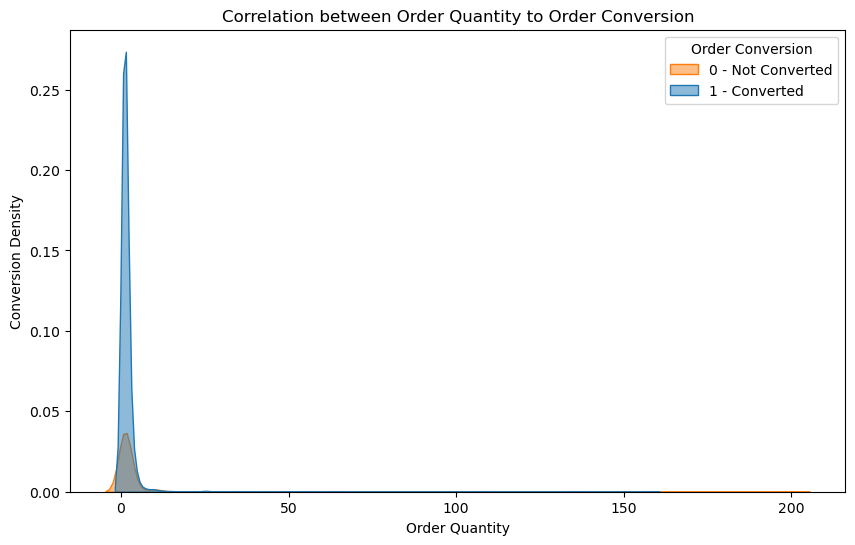

In [32]:
# Plotting a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=champo_sample_only, x='QtyRequired', hue='Order_Conversion', fill=True, alpha=0.5)
plt.title('Correlation between Order Quantity to Order Conversion')
plt.xlabel('Order Quantity')
plt.ylabel('Conversion Density')
plt.legend(title='Order Conversion', labels=['0 - Not Converted', '1 - Converted'])
plt.show()

When the needed amount is within 10, the density of converted and non-converted orders is larger, according to the density plot. There are, however, very few orders that are converted and non-converted as the order quantity increases.

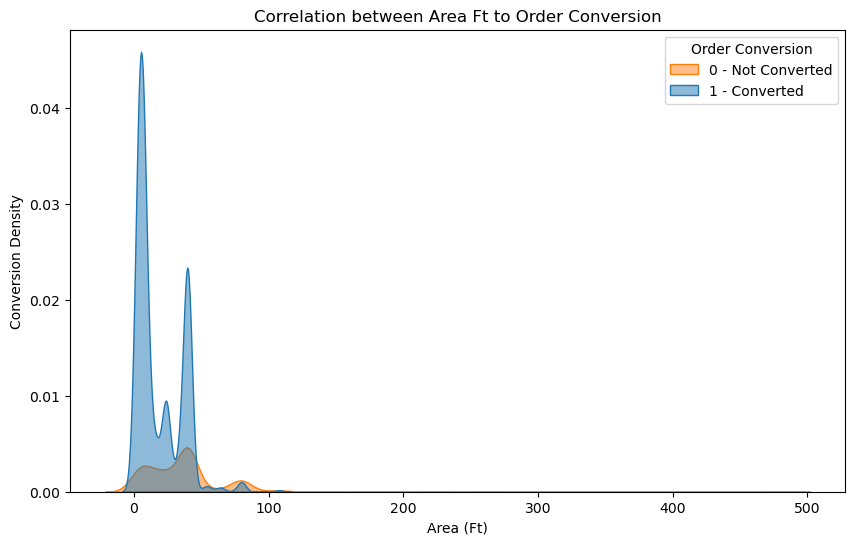

In [33]:
# Plotting a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=champo_sample_only, x='AreaFt', hue='Order_Conversion', fill=True, alpha=0.5)
plt.title('Correlation between Area Ft to Order Conversion')
plt.xlabel('Area (Ft)')
plt.ylabel('Conversion Density')
plt.legend(title='Order Conversion', labels=['0 - Not Converted', '1 - Converted'])
plt.show()

We may deduce that there is a peak in the Not Converted orders within a 50-foot radius from the density plot. But when we extend the carpet's surface, the order conversion begins to decline somewhat, seeing several highs and lows before finally becoming insignificant beyond 150 feet.

#### Analysis of Categorical Variables in Data on Sample ONLY sheet

In [66]:
# Contingency tables for each categorical variable
contingency_table_customer = pd.crosstab(champo_sample_only['CustomerCode'], champo_sample_only['Order_Conversion'])
contingency_table_country = pd.crosstab(champo_sample_only['CountryName'], champo_sample_only['Order_Conversion'])
contingency_table_item = pd.crosstab(champo_sample_only['ITEM_NAME'], champo_sample_only['Order_Conversion'])
contingency_table_shape = pd.crosstab(champo_sample_only['ShapeName'], champo_sample_only['Order_Conversion'])

# Chi-square tests
chi2_customer, p_customer, _, _ = chi2_contingency(contingency_table_customer, correction=False)
chi2_country, p_country, _, _ = chi2_contingency(contingency_table_country, correction=False)
chi2_item, p_item, _, _ = chi2_contingency(contingency_table_item, correction=False)
chi2_shape, p_shape, _, _ = chi2_contingency(contingency_table_shape, correction=False)

# Display results
print(f"Chi-square test for CustomerCode: X-squared = {chi2_customer}, p-value = {p_customer}")
print(f"Chi-square test for CountryName: X-squared = {chi2_country}, p-value = {p_country}")
print(f"Chi-square test for ITEM_NAME: X-squared = {chi2_item}, p-value = {p_item}")
print(f"Chi-square test for ShapeName: X-squared = {chi2_shape}, p-value = {p_shape}")

Chi-square test for CustomerCode: X-squared = 934.1880935837315, p-value = 6.589555737030517e-175
Chi-square test for CountryName: X-squared = 671.4617863978737, p-value = 4.3133057370252025e-135
Chi-square test for ITEM_NAME: X-squared = 679.0390606497516, p-value = 1.9811661671661864e-139
Chi-square test for ShapeName: X-squared = 9.422238742061484, p-value = 0.008994703534623033


# Balancing Data

In [67]:
# Print summary before balancing
print("Before Balancing")
print(champo_sample_only['Order_Conversion'].value_counts())

# Perform oversampling
ros = RandomOverSampler(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = ros.fit_resample(champo_sample_only.drop('Order_Conversion', axis=1), champo_sample_only['Order_Conversion'])

# Create a new DataFrame with balanced data
balanced_data = pd.concat([pd.DataFrame(X_resampled, columns=champo_sample_only.columns[:-1]), pd.Series(y_resampled, name='Order_Conversion')], axis=1)

# Print summary after balancing
print("After Balancing")
print(balanced_data['Order_Conversion'].value_counts())

Before Balancing
0    4651
1    1169
Name: Order_Conversion, dtype: int64
After Balancing
0    4651
1    4651
Name: Order_Conversion, dtype: int64


All of our models will be tested using both balanced and unbalanced data. On the other hand, we will utilise our balanced data to pinpoint the qualities that increase conversion.

# Classification Models

## 1. Decision Tree Unbalanced Data

In [68]:
champo_sample_only['CustomerCode'] = pd.factorize(champo_sample_only['CustomerCode'])[0]
champo_sample_only['CountryName'] = pd.factorize(champo_sample_only['CountryName'])[0]
champo_sample_only['ShapeName'] = pd.factorize(champo_sample_only['ShapeName'])[0]
champo_sample_only['ITEM_NAME'] = pd.factorize(champo_sample_only['ITEM_NAME'])[0]

In [69]:
champo_sample_only.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   CustomerCode      5820 non-null   int64   
 1   CountryName       5820 non-null   int64   
 2   QtyRequired       5820 non-null   int64   
 3   ITEM_NAME         5820 non-null   int64   
 4   ShapeName         5820 non-null   int64   
 5   AreaFt            5820 non-null   float64 
 6   Order_Conversion  5820 non-null   category
dtypes: category(1), float64(1), int64(5)
memory usage: 278.7 KB


In [70]:
champo_sample_only.tail()

CustomerCode  CountryName  QtyRequired  ITEM_NAME  ShapeName    AreaFt  \
5815            18            7            1          0          0    2.7778   
5816            18            7            1          0          0    2.7778   
5817            18            7            1          0          0    2.7778   
5818             1            1            1          1          0  480.0000   
5819             0            0            1          0          0   39.8125   

     Order_Conversion  
5815                0  
5816                0  
5817                0  
5818                1  
5819                0

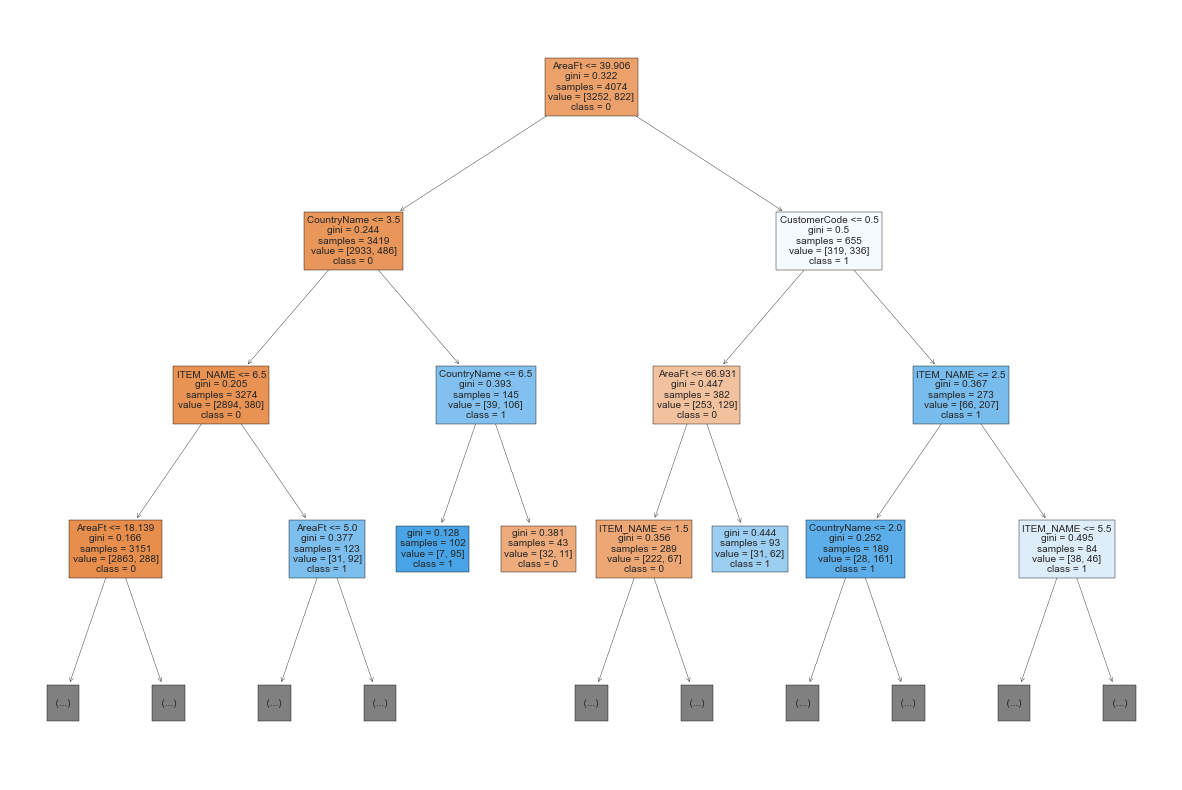

In [71]:
# Splitting the data into training and testing sets directly
seed = 1346
train, test = train_test_split(champo_sample_only, test_size=0.3, random_state=seed)

# Extracting features and target variable
features = champo_sample_only.columns[:-1]  # Assuming the last column is the target variable
target = 'Order_Conversion'

trainX = train[features]
testX = test[features]
trainY = train[target]
testY = test[target]

# Building the decision tree model
tree_model_unbalanced = DecisionTreeClassifier(
    criterion='gini',  # You can also use 'entropy'
    min_samples_split=20,
    min_samples_leaf=10,
    ccp_alpha=0.001,
    random_state=seed
)
tree_model_unbalanced.fit(trainX, trainY)

# Plotting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model_unbalanced, feature_names=features.tolist(), class_names=['0', '1'], filled=True, max_depth=3) # Adjust max_depth if needed
plt.show()

In [72]:
nleaves = tree_model_unbalanced.get_n_leaves()
print(nleaves)

28


In [73]:
# Predictions on training set
train_pred = tree_model_unbalanced.predict(trainX)

# Predictions on test set
test_pred = tree_model_unbalanced.predict(testX)

# Accuracy on training set
train_accuracy = accuracy_score(trainY, train_pred)
print(f'Training Accuracy: {train_accuracy:.4f}')

# Accuracy on test set
test_accuracy = accuracy_score(testY, test_pred)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Precision on test set
test_precision = precision_score(testY, test_pred)
print(f'Test Precision: {test_precision:.4f}')

# Recall on test set
test_recall = recall_score(testY, test_pred)
print(f'Test Recall: {test_recall:.4f}')

# Confusion matrix on test set
conf_matrix = confusion_matrix(testY, test_pred)
print('Confusion Matrix:')
print(conf_matrix)

Training Accuracy: 0.9094
Test Accuracy: 0.9038
Test Precision: 0.8327
Test Recall: 0.6455
Confusion Matrix:
[[1354   45]
 [ 123  224]]


In [74]:
# Error on training set
train_error = 1 - train_accuracy
print(f'Training Error: {train_error:.4f}')

# Error on test set
test_error = 1 - test_accuracy
print(f'Test Error: {test_error:.4f}')

Training Error: 0.0906
Test Error: 0.0962


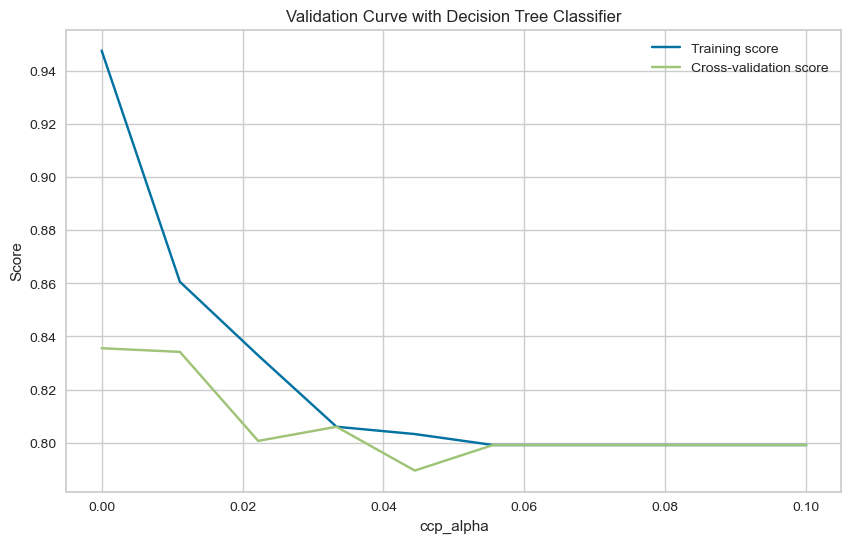

In [75]:
#Determining best Cp value

# Extracting features and target variable
features = champo_sample_only.columns[:-1]  
target = 'Order_Conversion'

X = champo_sample_only[features]
y = champo_sample_only[target]

# Building a sequence of values for the cost complexity parameter (ccp_alpha)
param_range = np.linspace(0, 0.1, 10) 
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=seed),
    X, y, param_name="ccp_alpha", param_range=param_range, cv=5
)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.xlabel("ccp_alpha")
plt.ylabel("Score")
plt.title("Validation Curve with Decision Tree Classifier")
plt.legend()
plt.show()

In [76]:
y_true = testY  # Actual labels (0 or 1)
y_scores = test_pred  # Predicted scores or probabilities

In [77]:
type(y_true)

pandas.core.series.Series

In [78]:
type(y_scores)

numpy.ndarray

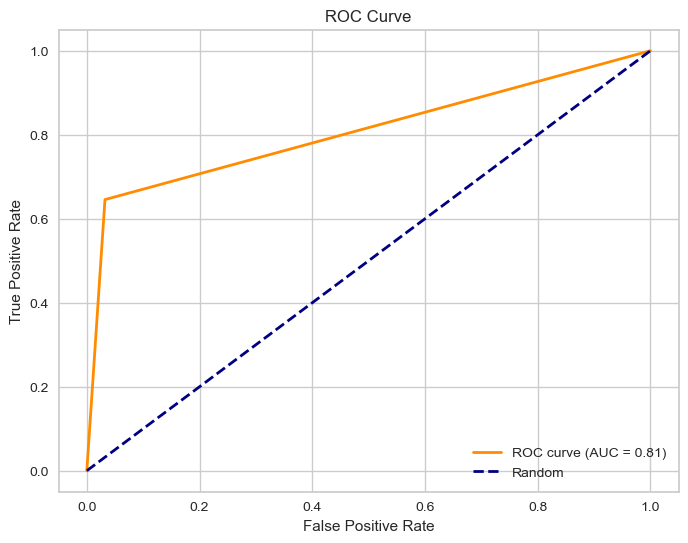

In [79]:
fpr, tpr, _ = roc_curve(y_true, y_scores)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

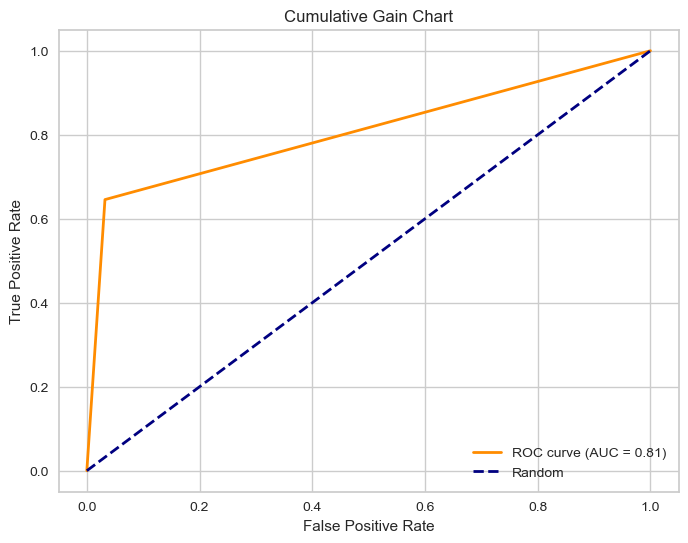

In [80]:
# Assuming `y_true` and `y_scores` are your actual data
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot Cumulative Gain Chart
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Cumulative Gain Chart')
plt.legend(loc='lower right')
plt.show()

In [81]:
# Calculate AUC
auc = roc_auc_score(y_true, y_scores)
print("The Area Under the Curve is", auc)

The Area Under the Curve is 0.8066836542363525


In [82]:
from sklearn.model_selection import KFold

k = 5
nmethod = 1
kf = KFold(n_splits=k, shuffle=True, random_state=None)

model_err = []

for i, (train_index, test_index) in enumerate(kf.split(champo_sample_only)):
    train, test = champo_sample_only.iloc[train_index], champo_sample_only.iloc[test_index]
    
    # Extracting features and target variable
    features = champo_sample_only.columns[:-1]  
    target = 'Order_Conversion'

    trainX = train[features]
    testX = test[features]
    trainY = train[target]
    testY = test[target]

    # Building the decision tree model
    tree_model = DecisionTreeClassifier(
        criterion='gini',  # You can also use 'entropy'
        min_samples_split=20,
        min_samples_leaf=10,
        ccp_alpha=0.001
    )
    
    tree_model.fit(trainX, trainY)
    predict_treemodel = tree_model.predict(testX)
    
    model_err.append(1 - accuracy_score(testY, predict_treemodel))

print("The CV Error rate of Decision Tree after Cross Validation is", round(np.mean(model_err), 3))

The CV Error rate of Decision Tree after Cross Validation is 0.096


Since the model performed best at these values—20 and 10, respectively—we decided to use them as the final min_samples_split and min_samples_leaf values for the Decision Tree of Unbalanced data. We saw the outcomes when we built a decision tree using ccp_alpha = 0 (which is equal to cp = -1 in R), min_samples_split = 0, and min_samples_leaf = 0. We were able to determine the lowest drop in the ccp_alpha value below the horizontal line—roughly 0.001—from the cost complexity pruning (ccp) graphic. This is frequently a reliable source of the ccp_alpha value. Additionally, we determined the associated ccp_alpha value by verifying the value that corresponded to the lowest drop in the cross-validation error (xerror) value. We obtained a ccp_alpha value of 0.001 from both studies.

## 1. Decision Tree Balanced Data

In [83]:
balanced_data['CustomerCode'] = pd.factorize(balanced_data['CustomerCode'])[0]
balanced_data['CountryName'] = pd.factorize(balanced_data['CountryName'])[0]
balanced_data['ShapeName'] = pd.factorize(balanced_data['ShapeName'])[0]
balanced_data['ITEM_NAME'] = pd.factorize(balanced_data['ITEM_NAME'])[0]

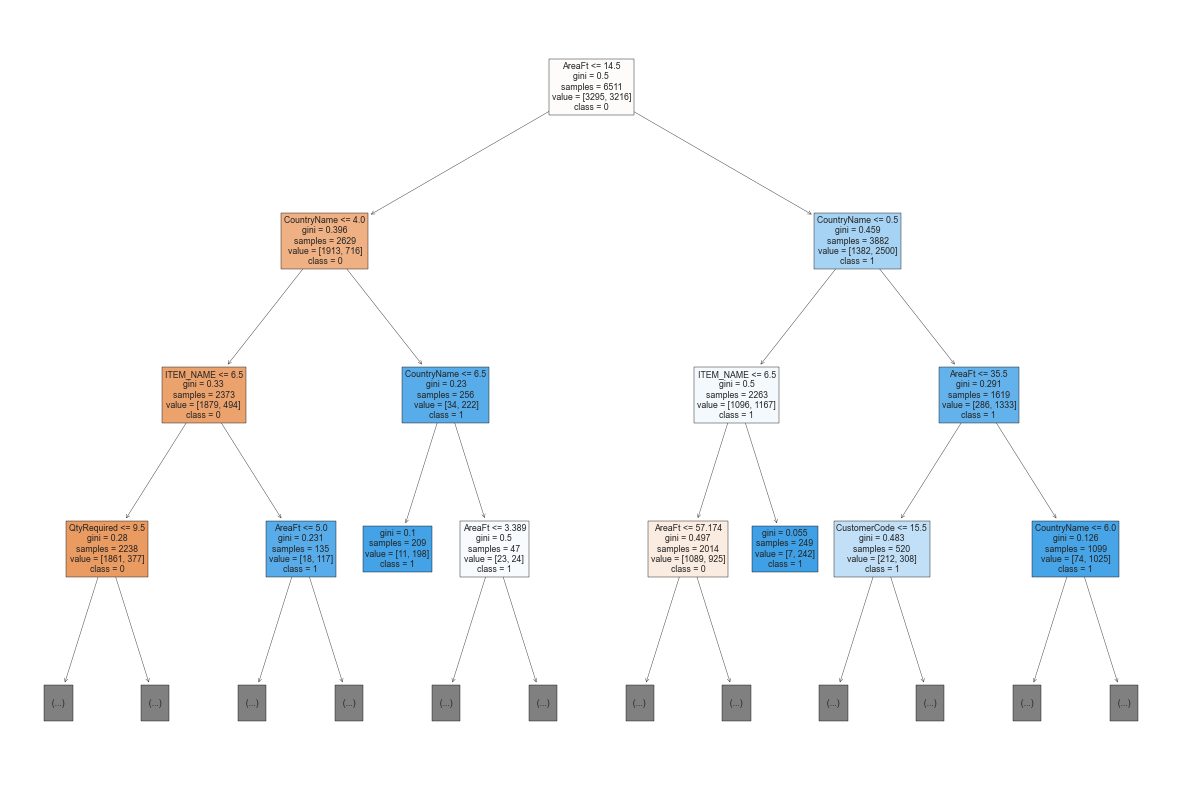

In [84]:
 # Splitting the data into training and testing sets directly
seed = 1346
train, test = train_test_split(balanced_data, test_size=0.3, random_state=seed)

# Extracting features and target variable
features = balanced_data.columns[:-1]  
target = 'Order_Conversion'

trainX = train[features]
testX = test[features]
trainY = train[target]
testY = test[target]

# Building the decision tree model for balanced data
tree_model_balanced = DecisionTreeClassifier(
    criterion='gini',  # You can also use 'entropy'
    min_samples_split=20,
    min_samples_leaf=10,
    ccp_alpha=0.001,
    random_state=seed
)
tree_model_balanced.fit(trainX, trainY)

# Plotting the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model_balanced, feature_names=features.tolist(), class_names=['0', '1'], filled=True, max_depth=3)  # Adjust max_depth if needed
plt.show()

In [85]:
n_leaves = tree_model_balanced.get_n_leaves()
print("The number of leaves in the decision tree is", n_leaves)

The number of leaves in the decision tree is 44


In [86]:
# Predictions on the training set
train_predictions = tree_model_balanced.predict(trainX)

# Predictions on the test set
test_predictions = tree_model_balanced.predict(testX)

# True labels for the training set
train_true_labels = train['Order_Conversion']

# True labels for the test set
test_true_labels = test['Order_Conversion']

# Calculate metrics for the training set
train_accuracy = accuracy_score(train_true_labels, train_predictions)
train_recall = recall_score(train_true_labels, train_predictions)
train_precision = precision_score(train_true_labels, train_predictions)
train_error = 1 - train_accuracy

# Calculate metrics for the test set
test_accuracy = accuracy_score(test_true_labels, test_predictions)
test_recall = recall_score(test_true_labels, test_predictions)
test_precision = precision_score(test_true_labels, test_predictions)
test_error = 1 - test_accuracy

# Print the results
print("Training Set Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Error: {train_error:.4f}\n")

print("Test Set Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Error: {test_error:.4f}")

Training Set Metrics:
Accuracy: 0.8705
Recall: 0.8066
Precision: 0.9215
Error: 0.1295

Test Set Metrics:
Accuracy: 0.8671
Recall: 0.8244
Precision: 0.9086
Error: 0.1329


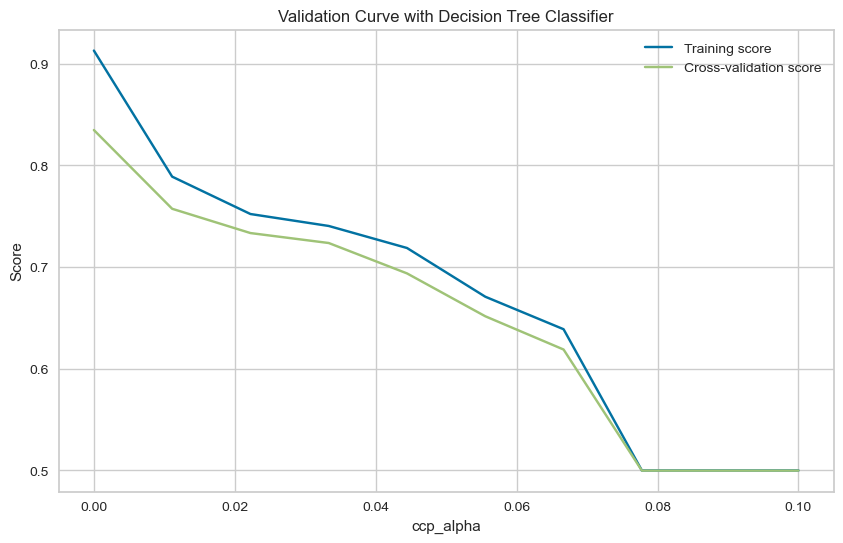

In [87]:
#Determining best Cp value

features = balanced_data.columns[:-1]  
target = 'Order_Conversion'

X = balanced_data[features]
y = balanced_data[target]

# Building a sequence of values for the cost complexity parameter (ccp_alpha)
param_range = np.linspace(0, 0.1, 10)  
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(random_state=seed),
    X, y, param_name="ccp_alpha", param_range=param_range, cv=5
)

# Plotting the validation curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, np.mean(train_scores, axis=1), label="Training score")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Cross-validation score")
plt.xlabel("ccp_alpha")
plt.ylabel("Score")
plt.title("Validation Curve with Decision Tree Classifier")
plt.legend()
plt.show()

In [88]:
from sklearn.model_selection import cross_val_score

# List of ccp_alpha values to consider
ccp_alphas = np.arange(0.001, 0.02, 0.001)

# Dictionary to store cross-validated error rates
cv_errors = {}

# Cross-validate for each ccp_alpha
for alpha in ccp_alphas:
    tree_model = DecisionTreeClassifier(
        ccp_alpha=alpha,
        min_samples_split=20,
        min_samples_leaf=10,
        random_state=1346
    )
    
    # Cross-validate using 5-fold stratified cross-validation
    scores = cross_val_score(tree_model, trainX, train_true_labels, cv=5, scoring='accuracy')
    
    # Store the mean error rate
    cv_errors[alpha] = 1 - np.mean(scores)

# Print the cross-validated error rates
for alpha, error_rate in cv_errors.items():
    print(f"ccp_alpha: {alpha:.4f}, Cross-validated Error Rate: {error_rate:.4f}")

ccp_alpha: 0.0010, Cross-validated Error Rate: 0.1368
ccp_alpha: 0.0020, Cross-validated Error Rate: 0.1441
ccp_alpha: 0.0030, Cross-validated Error Rate: 0.1537
ccp_alpha: 0.0040, Cross-validated Error Rate: 0.1662
ccp_alpha: 0.0050, Cross-validated Error Rate: 0.1759
ccp_alpha: 0.0060, Cross-validated Error Rate: 0.1901
ccp_alpha: 0.0070, Cross-validated Error Rate: 0.1998
ccp_alpha: 0.0080, Cross-validated Error Rate: 0.2047
ccp_alpha: 0.0090, Cross-validated Error Rate: 0.2147
ccp_alpha: 0.0100, Cross-validated Error Rate: 0.2155
ccp_alpha: 0.0110, Cross-validated Error Rate: 0.2155
ccp_alpha: 0.0120, Cross-validated Error Rate: 0.2201
ccp_alpha: 0.0130, Cross-validated Error Rate: 0.2201
ccp_alpha: 0.0140, Cross-validated Error Rate: 0.2201
ccp_alpha: 0.0150, Cross-validated Error Rate: 0.2201
ccp_alpha: 0.0160, Cross-validated Error Rate: 0.2201
ccp_alpha: 0.0170, Cross-validated Error Rate: 0.2292
ccp_alpha: 0.0180, Cross-validated Error Rate: 0.2480
ccp_alpha: 0.0190, Cross-val

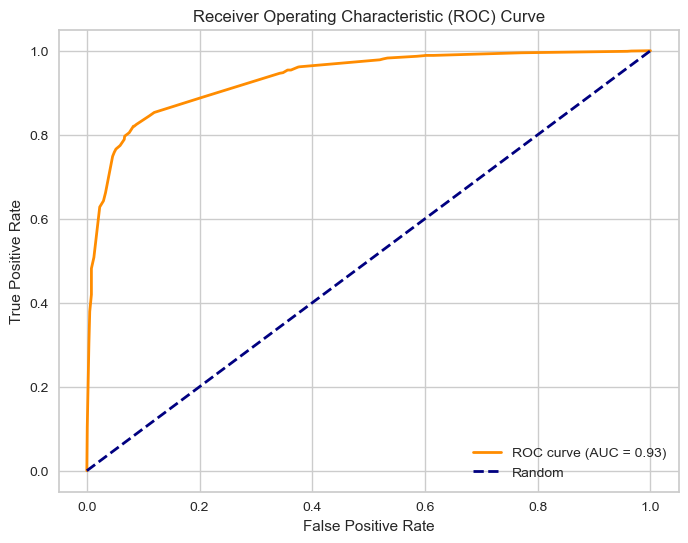

In [89]:
from sklearn.metrics import roc_curve, auc
y_scores = tree_model_balanced.predict_proba(testX)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(test_true_labels, y_scores)

# Calculate area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [90]:
# Get predicted probabilities for the positive class (class 1)
y_scores = tree_model_balanced.predict_proba(testX)[:, 1]

# Calculate AUC
roc_auc = roc_auc_score(test_true_labels, y_scores)

# Print the AUC
print(f'The Area Under the Curve is {roc_auc:.4f}')

The Area Under the Curve is 0.9347


We found that the ideal values for minsplit and minbucket were, respectively, 20 and 10. When building a decision tree, these parameter settings produced the best results in terms of accuracy and precision. First, a decision tree with the parameters cp = 0.001, minsplit = 20, and minbucket = 10 was constructed. The observation of the cp plot, which showed the lowest drop in the cp value below the horizontal, which happened at around 0.001, guided the choice to select cp = 0.001. This drop frequently represents an ideal cp value. In addition, we checked that the selected cp value matched the lowest drop in the xerror value, leading to a finalised and verified cp value of 0.001.

In [91]:
importances = tree_model_balanced.feature_importances_
print("Variable Importance:")
for feature, importance in zip(features, importances):
    print(f"{feature}: {importance}")

Variable Importance:
CustomerCode: 0.05303883806303099
CountryName: 0.23962372972276486
QtyRequired: 0.03348490437243597
ITEM_NAME: 0.2797624976525628
ShapeName: 0.004722129750821419
AreaFt: 0.389367900438384


 After calculating variable significance using the Balanced Data Decision Tree, we determine the following traits to be the most crucial ones:
1. SpaceFirst 2. CodeClient 3. ITEM_NAME 4. Name of Country 5. Quantity Needed 6. Shape Name
 
Consequently, these factors have made the most contributions to the target variable. Order_Conversion

## 2. Random Forest - Unbalanced Data

In [92]:
# Splitting the data into features (X) and target variable (y)
X = champo_sample_only.drop('Order_Conversion', axis=1)
y = champo_sample_only['Order_Conversion']

# Setting a random seed for reproducibility
np.random.seed(1346)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1346)

# Building the Random Forest classifier
rfu = RandomForestClassifier(n_estimators=300, max_features='sqrt', random_state=1346)
rfu.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rfu.predict(X_test)

# Printing the Random Forest model details
print(rfu)

# Printing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

RandomForestClassifier(n_estimators=300, random_state=1346)
Accuracy: 0.9261


In [93]:
# Splitting the data into features (X) and target variable (y)
X = champo_sample_only.drop('Order_Conversion', axis=1)
y = champo_sample_only['Order_Conversion']

# Setting a random seed for reproducibility
np.random.seed(1346)

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1346)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1346)

# List of candidate values for n_estimators
n_estimators_values = [50, 100, 150, 200, 250, 300]

# Dictionary to store prediction error for each n_estimators value
prediction_error_dict = {}

for n_estimators in n_estimators_values:
    # Building the Random Forest classifier with different n_estimators
    rf = RandomForestClassifier(n_estimators=n_estimators, max_features='sqrt', random_state=1346)
    rf.fit(X_train, y_train)

    # Making predictions on the validation set
    y_pred_validation = rf.predict(X_validation)

    # Calculating prediction error on the validation set
    prediction_error = 1 - accuracy_score(y_validation, y_pred_validation)

    # Storing prediction error in the dictionary
    prediction_error_dict[n_estimators] = prediction_error

# Finding the best n_estimators with the minimum prediction error
best_n_estimators = min(prediction_error_dict, key=prediction_error_dict.get)

# Printing the results
print("Prediction Error for Different n_estimators:")
for n_estimators, error in prediction_error_dict.items():
    print(f"n_estimators = {n_estimators}: {error:.4f}")

print(f"\nBest n_estimators: {best_n_estimators} with Prediction Error: {prediction_error_dict[best_n_estimators]:.4f}")

# Building the final Random Forest model with the best n_estimators
final_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_features='sqrt', random_state=1346)
final_rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_test = final_rf_model.predict(X_test)

# Printing the final Random Forest model details
print("\nFinal Random Forest Model:")
print(final_rf_model)

# Printing the prediction error of the final model on the test set
final_prediction_error = 1 - accuracy_score(y_test, y_pred_test)
print(f"Prediction Error on Test Set: {final_prediction_error:.4f}")

Prediction Error for Different n_estimators:
n_estimators = 50: 0.0767
n_estimators = 100: 0.0745
n_estimators = 150: 0.0710
n_estimators = 200: 0.0733
n_estimators = 250: 0.0710
n_estimators = 300: 0.0710

Best n_estimators: 150 with Prediction Error: 0.0710

Final Random Forest Model:
RandomForestClassifier(n_estimators=150, random_state=1346)
Prediction Error on Test Set: 0.0767


In [94]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
# Making predictions on the training set
y_pred_train = final_rf_model.predict(X_train)

# Calculating metrics for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
error_train = 1 - accuracy_train

# Making predictions on the test set
y_pred_test = final_rf_model.predict(X_test)

# Calculating metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
error_test = 1 - accuracy_test

# Confusion Matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Printing the results
print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Error: {error_train:.4f}")

print("\nMetrics for Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Error: {error_test:.4f}")

# Confusion Matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 0.9465
Recall: 0.7920
Precision: 0.9327
Error: 0.0535

Metrics for Test Set:
Accuracy: 0.9233
Recall: 0.7178
Precision: 0.8478
Error: 0.0767

Confusion Matrix for Test Set:
[[689  21]
 [ 46 117]]


Using the ntree value of 300, Random Forest was implemented. The following stage was iterating over a range of values using a for loop to get the optimal ntree. After that, we ran the Random Forest model once again with the optimal ntree= 150, and this time, we got an average error rate of 7.54%. "

## 2. Random forest - Balanced Data

In [95]:
# Splitting the data into features (X) and target variable (y)
X = balanced_data.drop('Order_Conversion', axis=1)
y = balanced_data['Order_Conversion']

# Setting a random seed for reproducibility
np.random.seed(1346)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1346)

# Building the Random Forest classifier
rf = RandomForestClassifier(n_estimators=300, max_features='sqrt', random_state=1346)
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf.predict(X_test)

# Printing the Random Forest model details
print(rf)

# Printing the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

RandomForestClassifier(n_estimators=300, random_state=1346)
Accuracy: 0.9025


In [96]:
# Splitting the data into features (X) and target variable (y)
X =balanced_data.drop('Order_Conversion', axis=1)
y = balanced_data['Order_Conversion']

# Setting a random seed for reproducibility
np.random.seed(1346)

# Splitting the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1346)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1346)

# List of candidate values for n_estimators
n_estimators_values = [50, 100, 150, 200, 250, 300]

# Dictionary to store prediction error for each n_estimators value
prediction_error_dict = {}

for n_estimators in n_estimators_values:
    # Building the Random Forest classifier with different n_estimators
    rf = RandomForestClassifier(n_estimators=n_estimators, max_features='sqrt', random_state=1346)
    rf.fit(X_train, y_train)

    # Making predictions on the validation set
    y_pred_validation = rf.predict(X_validation)

    # Calculating prediction error on the validation set
    prediction_error = 1 - accuracy_score(y_validation, y_pred_validation)

    # Storing prediction error in the dictionary
    prediction_error_dict[n_estimators] = prediction_error

# Finding the best n_estimators with the minimum prediction error
best_n_estimators = min(prediction_error_dict, key=prediction_error_dict.get)

# Printing the results
print("Prediction Error for Different n_estimators:")
for n_estimators, error in prediction_error_dict.items():
    print(f"n_estimators = {n_estimators}: {error:.4f}")

print(f"\nBest n_estimators: {best_n_estimators} with Prediction Error: {prediction_error_dict[best_n_estimators]:.4f}")

# Building the final Random Forest model with the best n_estimators
final_rf_model = RandomForestClassifier(n_estimators=best_n_estimators, max_features='sqrt', random_state=1346)
final_rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_test = final_rf_model.predict(X_test)

# Printing the final Random Forest model details
print("\nFinal Random Forest Model:")
print(final_rf_model)

# Printing the prediction error of the final model on the test set
final_prediction_error = 1 - accuracy_score(y_test, y_pred_test)
print(f"Prediction Error on Test Set: {final_prediction_error:.4f}")

Prediction Error for Different n_estimators:
n_estimators = 50: 0.0903
n_estimators = 100: 0.0946
n_estimators = 150: 0.0946
n_estimators = 200: 0.0910
n_estimators = 250: 0.0910
n_estimators = 300: 0.0918

Best n_estimators: 50 with Prediction Error: 0.0903

Final Random Forest Model:
RandomForestClassifier(n_estimators=50, random_state=1346)
Prediction Error on Test Set: 0.1060


In [97]:
# Making predictions on the training set
y_pred_train = final_rf_model.predict(X_train)

# Calculating metrics for the training set
accuracy_train = accuracy_score(y_train, y_pred_train)
recall_train = recall_score(y_train, y_pred_train)
precision_train = precision_score(y_train, y_pred_train)
error_train = 1 - accuracy_train

# Making predictions on the test set
y_pred_test = final_rf_model.predict(X_test)

# Calculating metrics for the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
error_test = 1 - accuracy_test

# Confusion Matrix for the test set
conf_matrix_test = confusion_matrix(y_test, y_pred_test)

# Printing the results
print("Metrics for Training Set:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Error: {error_train:.4f}")

print("\nMetrics for Test Set:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Error: {error_test:.4f}")

# Confusion Matrix for the test set
print("\nConfusion Matrix for Test Set:")
print(conf_matrix_test)

Metrics for Training Set:
Accuracy: 0.9069
Recall: 0.8560
Precision: 0.9506
Error: 0.0931

Metrics for Test Set:
Accuracy: 0.8940
Recall: 0.8527
Precision: 0.9319
Error: 0.1060

Confusion Matrix for Test Set:
[[646  44]
 [104 602]]


Using the ntree parameter of 300 to implement Random Forest. The following stage was iterating over a range of values using a for loop to get the optimal ntree values. After that, we ran the Random Forest model once again with the optimal ntree= 50, and this time, we were able to get an average error rate of 9.03%.

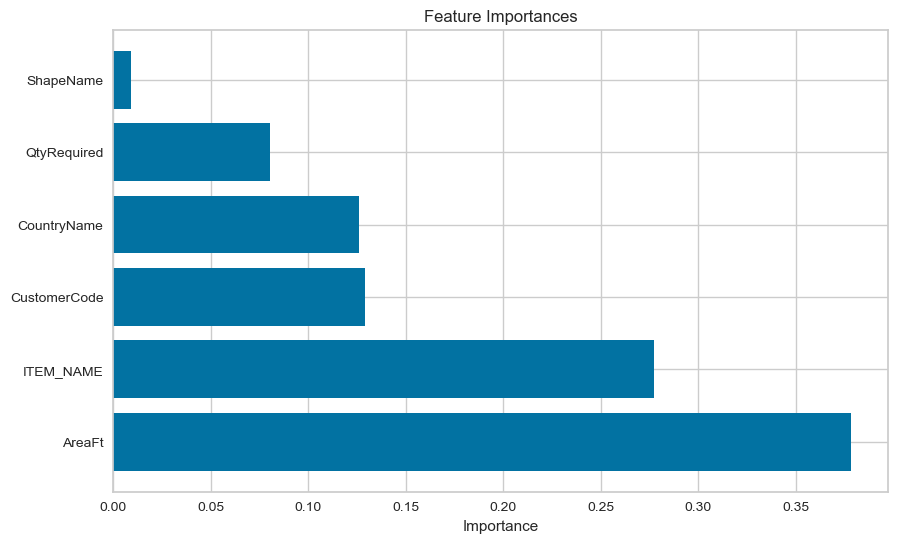

In [98]:
# Get feature importances from the trained model
feature_importances = final_rf_model.feature_importances_

# Get the names of the features
feature_names = X.columns

# Create a DataFrame to display feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()

After calculating variable importance, we get the following attributes from the Balanced Data Random Forest Model as the most crucial attributes: 
1. AreaFt  2.CustomerCode  3. ITEM_NAME 4. CountryName 5. QtyRequired 6. ShapeName

Consequently, these variables made the most contributions to the goal variable, Order_Conversion.

#### Note:
Using recall as our metric, we can see that our balanced data set outperformed the test data, with a recall percentage of 85.27%.

## 3. Logistic Regression - Unbalanced Data

In [99]:
features = champo_sample_only.columns[:-1]
target = champo_sample_only.columns[-1]

# Splitting the data into training and testing sets
train, test = train_test_split(champo_sample_only, test_size=0.3, random_state=1766)

# Extracting features and target variable for training set
trainX = train[features]
trainY = train[target]

# Extracting features and target variable for testing set
testX = test[features]
testY = test[target]

# Building the logistic regression model
logit_model_unbalanced = LogisticRegression(random_state=1766)
logit_model_unbalanced.fit(trainX, trainY)

# Making predictions on the test set
pred_prob = logit_model_unbalanced.predict_proba(testX)[:, 1]
class_pred = np.where(pred_prob >= 0.5, 1, 0)

# Confusion Matrix
CM = confusion_matrix(testY, class_pred)
print("Confusion Matrix:")
print(CM)

# Accuracy Score
accuracy = accuracy_score(testY, class_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(testY, class_pred))

Confusion Matrix:
[[1346   46]
 [ 270   84]]

Accuracy: 0.8190

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1392
           1       0.65      0.24      0.35       354

    accuracy                           0.82      1746
   macro avg       0.74      0.60      0.62      1746
weighted avg       0.80      0.82      0.78      1746



## 3. Logistic Regression - Balanced Data

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming champo_sample_only is a pandas DataFrame
# If it's not, you should read the Excel file using pd.read_excel first

# Assuming the last column is the target variable
features = balanced_data.columns[:-1]
target = balanced_data.columns[-1]

# Splitting the data into training and testing sets
train, test = train_test_split(champo_sample_only, test_size=0.3, random_state=1766)

# Extracting features and target variable for training set
trainX = train[features]
trainY = train[target]

# Extracting features and target variable for testing set
testX = test[features]
testY = test[target]

# Building the logistic regression model
logit_model_balanced = LogisticRegression(random_state=1766)
logit_model_balanced.fit(trainX, trainY)

# Making predictions on the training set
train_pred_prob = logit_model_balanced.predict_proba(trainX)[:, 1]
train_class_pred = np.where(train_pred_prob >= 0.5, 1, 0)

# Confusion Matrix for training set
train_CM = confusion_matrix(trainY, train_class_pred)
print("\nLogistic Regression Training Confusion Matrix:")
print(train_CM)

# Accuracy Score for training set
train_accuracy = accuracy_score(trainY, train_class_pred)
print(f"\nLogistic Regression Training Accuracy: {train_accuracy:.4f}")

# Classification Report for training set
print("\nLogistic Regression Training Classification Report:")
print(classification_report(trainY, train_class_pred))

# Making predictions on the test set
test_pred_prob = logit_model_balanced.predict_proba(testX)[:, 1]
test_class_pred = np.where(test_pred_prob >= 0.5, 1, 0)

# Confusion Matrix for test set
test_CM = confusion_matrix(testY, test_class_pred)
print("\nLogistic Regression Test Confusion Matrix:")
print(test_CM)

# Accuracy Score for test set
test_accuracy = accuracy_score(testY, test_class_pred)
print(f"\nLogistic Regression Test Accuracy: {test_accuracy:.4f}")

# Classification Report for test set
print("\nLogistic Regression Test Classification Report:")
print(classification_report(testY, test_class_pred))



Logistic Regression Training Confusion Matrix:
[[3186   73]
 [ 624  191]]

Logistic Regression Training Accuracy: 0.8289

Logistic Regression Training Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      3259
           1       0.72      0.23      0.35       815

    accuracy                           0.83      4074
   macro avg       0.78      0.61      0.63      4074
weighted avg       0.81      0.83      0.79      4074


Logistic Regression Test Confusion Matrix:
[[1346   46]
 [ 270   84]]

Logistic Regression Test Accuracy: 0.8190

Logistic Regression Test Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1392
           1       0.65      0.24      0.35       354

    accuracy                           0.82      1746
   macro avg       0.74      0.60      0.62      1746
weighted avg       0.80      0.82      0.78      1746



## 4 - Neural Network

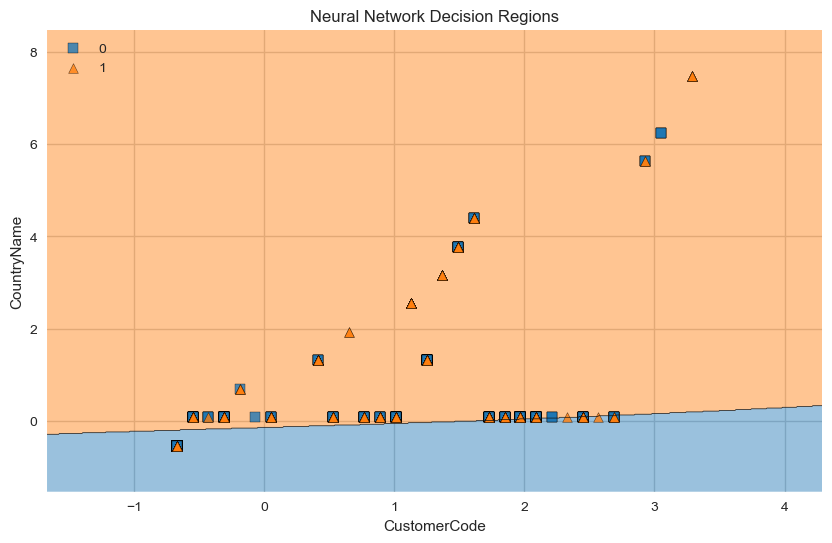

Training Set Results:
Accuracy: 0.6312
Confusion Matrix:
[[2458  837]
 [1564 1652]]
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.75      0.67      3295
           1       0.66      0.51      0.58      3216

    accuracy                           0.63      6511
   macro avg       0.64      0.63      0.63      6511
weighted avg       0.64      0.63      0.63      6511


Testing Set Results:
Accuracy: 0.6263
Confusion Matrix:
[[1004  352]
 [ 691  744]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.74      0.66      1356
           1       0.68      0.52      0.59      1435

    accuracy                           0.63      2791
   macro avg       0.64      0.63      0.62      2791
weighted avg       0.64      0.63      0.62      2791



In [120]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Assuming 'balanced_data' contains your dataset

X = balanced_data.iloc[:, :-1]  # Features
y = balanced_data.iloc[:, -1]   # Target

# Choose two features for visualization
features_for_visualization = X.columns[:2]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[features_for_visualization], y, test_size=0.3, random_state=1346)

# Standardize the data (optional, but often recommended for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Building the neural network model
nn_model = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', max_iter=3000, random_state=1346)
nn_model.fit(X_train_scaled, y_train)

# Making predictions on the training set
y_train_pred = nn_model.predict(X_train_scaled)

# Evaluating the model on training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
train_class_report = classification_report(y_train, y_train_pred)

# Making predictions on the test set
y_test_pred = nn_model.predict(X_test_scaled)

# Evaluating the model on test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

# Plotting the decision regions
plt.figure(figsize=(10, 6))
plot_decision_regions(X_test_scaled, np.array(y_test), clf=nn_model, legend=2)
plt.title('Neural Network Decision Regions')
plt.xlabel(features_for_visualization[0])
plt.ylabel(features_for_visualization[1])
plt.show()

# Printing the results
print("Training Set Results:")
print(f"Accuracy: {train_accuracy:.4f}")
print("Confusion Matrix:")
print(train_conf_matrix)
print("Classification Report:")
print(train_class_report)

print("\nTesting Set Results:")
print(f"Accuracy: {test_accuracy:.4f}")
print("Confusion Matrix:")
print(test_conf_matrix)
print("Classification Report:")
print(test_class_report)


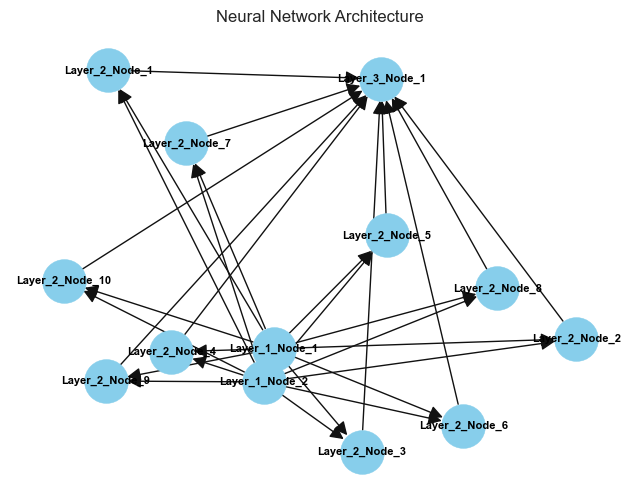

In [102]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the neural network architecture
layers = [X_train_scaled.shape[1], 10, 1]

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for i, layer in enumerate(layers):
    for j in range(layer):
        G.add_node(f'Layer_{i + 1}_Node_{j + 1}')

# Add edges
for i in range(len(layers) - 1):
    for j in range(layers[i]):
        for k in range(layers[i + 1]):
            G.add_edge(f'Layer_{i + 1}_Node_{j + 1}', f'Layer_{i + 2}_Node_{k + 1}')

# Draw the graph
pos = nx.spring_layout(G)
fig, ax = plt.subplots(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=1000, node_color='skyblue', font_color='black', font_size=8, arrowsize=20, ax=ax)
plt.title('Neural Network Architecture')
plt.show()

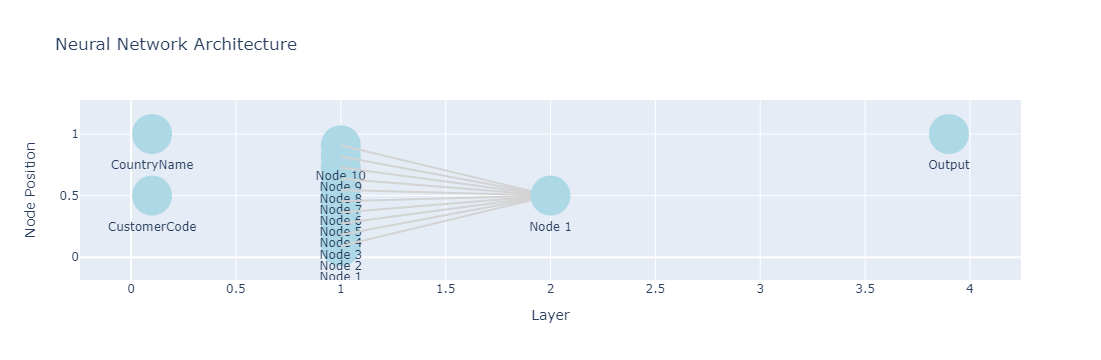

In [103]:
import plotly.graph_objects as go
import plotly.express as px

# Extract weights and biases from the neural network model
weights = [coef.T for coef in nn_model.coefs_]
biases = [coef.reshape(-1, 1) for coef in nn_model.intercepts_]

# Create a plotly figure
fig = go.Figure()

# Add nodes for input layer
fig.add_trace(go.Scatter(x=[0.1] * X_train_scaled.shape[1], y=[i / X_train_scaled.shape[1] for i in range(1, X_train_scaled.shape[1] + 1)],
                         mode='markers+text',
                         marker=dict(size=40, color='lightblue'),
                         text=features_for_visualization,
                         textposition='bottom center'))

# Add nodes and edges for hidden layers
for layer, (weight, bias) in enumerate(zip(weights, biases)):
    # Nodes
    nodes_y = [i / (len(weight) + 1) for i in range(1, len(weight) + 1)]
    fig.add_trace(go.Scatter(x=[layer + 1] * len(weight), y=nodes_y,
                             mode='markers+text',
                             marker=dict(size=40, color='lightblue'),
                             text=['Node ' + str(i + 1) for i in range(len(weight))],
                             textposition='bottom center'))

    # Edges
    if layer < len(weights) - 1:
        next_nodes_y = [i / (len(weights[layer + 1]) + 1) for i in range(1, len(weights[layer + 1]) + 1)]
        for i, node_y in enumerate(nodes_y):
            for j, next_node_y in enumerate(next_nodes_y):
                fig.add_trace(go.Scatter(x=[layer + 1, layer + 2], y=[node_y, next_node_y],
                                         mode='lines',
                                         line=dict(color='lightgray', width=2)))

# Add nodes for output layer
fig.add_trace(go.Scatter(x=[len(weights) + 1.9], y=[1],
                         mode='markers+text',
                         marker=dict(size=40, color='lightblue'),
                         text=['Output'],
                         textposition='bottom center'))

# Update layout
fig.update_layout(title_text="Neural Network Architecture",
                  showlegend=False,
                  xaxis=dict(title='Layer'),
                  yaxis=dict(title='Node Position'),
                  hovermode='closest')

# Show the plot
fig.show()

# 5. K Nearest Neighbors:

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Building the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)

# Training the model
knn_model.fit(trainX, trainY)

# Making predictions on the training set
train_pred = knn_model.predict(trainX)

# Confusion Matrix for training set
train_CM = confusion_matrix(trainY, train_pred)
print("\nKNN Training Confusion Matrix:")
print(train_CM)

# Accuracy Score for training set
train_accuracy = accuracy_score(trainY, train_pred)
print(f"\nKNN Training Accuracy: {train_accuracy:.4f}")

# Classification Report for training set
print("\nKNN Training Classification Report:")
print(classification_report(trainY, train_pred))

# Making predictions on the test set
test_pred = knn_model.predict(testX)

# Confusion Matrix for test set
test_CM = confusion_matrix(testY, test_pred)
print("\nKNN Test Confusion Matrix:")
print(test_CM)

# Accuracy Score for test set
test_accuracy = accuracy_score(testY, test_pred)
print(f"\nKNN Test Accuracy: {test_accuracy:.4f}")

# Classification Report for test set
print("\nKNN Test Classification Report:")
print(classification_report(testY, test_pred))



KNN Training Confusion Matrix:
[[3176   83]
 [ 231  584]]

KNN Training Accuracy: 0.9229

KNN Training Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3259
           1       0.88      0.72      0.79       815

    accuracy                           0.92      4074
   macro avg       0.90      0.85      0.87      4074
weighted avg       0.92      0.92      0.92      4074


KNN Test Confusion Matrix:
[[1340   52]
 [ 117  237]]

KNN Test Accuracy: 0.9032

KNN Test Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1392
           1       0.82      0.67      0.74       354

    accuracy                           0.90      1746
   macro avg       0.87      0.82      0.84      1746
weighted avg       0.90      0.90      0.90      1746



# 5. Support Vector Machine:

In [121]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Building the SVM model
svm_model = SVC(probability=True, random_state=1766)

# Training the model
svm_model.fit(trainX, trainY)

# Making predictions on the training set
train_pred = svm_model.predict(trainX)

# Confusion Matrix for training set
train_CM = confusion_matrix(trainY, train_pred)
print("\nSVM Training Confusion Matrix:")
print(train_CM)

# Accuracy Score for training set
train_accuracy = accuracy_score(trainY, train_pred)
print(f"\nSVM Training Accuracy: {train_accuracy:.4f}")

# Classification Report for training set
print("\nSVM Training Classification Report:")
print(classification_report(trainY, train_pred))

# Making predictions on the test set
test_pred = svm_model.predict(testX)

# Confusion Matrix for test set
test_CM = confusion_matrix(testY, test_pred)
print("\nSVM Test Confusion Matrix:")
print(test_CM)

# Accuracy Score for test set
test_accuracy = accuracy_score(testY, test_pred)
print(f"\nSVM Test Accuracy: {test_accuracy:.4f}")

# Classification Report for test set
print("\nSVM Test Classification Report:")
print(classification_report(testY, test_pred))



SVM Training Confusion Matrix:
[[3167   92]
 [ 576  239]]

SVM Training Accuracy: 0.8360

SVM Training Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      3259
           1       0.72      0.29      0.42       815

    accuracy                           0.84      4074
   macro avg       0.78      0.63      0.66      4074
weighted avg       0.82      0.84      0.81      4074


SVM Test Confusion Matrix:
[[1346   46]
 [ 253  101]]

SVM Test Accuracy: 0.8288

SVM Test Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1392
           1       0.69      0.29      0.40       354

    accuracy                           0.83      1746
   macro avg       0.76      0.63      0.65      1746
weighted avg       0.81      0.83      0.80      1746



##### Analysis Conclusion: Decision Tree Model with 70-30 split is the best model to recommend to Champo Carpets as this yields the highest Recall ( as we want to minimize FN as much as possible).

# Data clustering - K means Clustering

In [106]:
champo_cluster = pd.read_excel('System Analytics Project 1 Data.xlsx', sheet_name=5)

In [107]:
display(champo_cluster)

# Create a copy of the data
champo_cluster_copy = champo_cluster.copy()

# Convert Row_Labels to numeric
champo_cluster_copy['Row Labels'] = pd.to_numeric(pd.factorize(champo_cluster_copy['Row Labels'])[0])

# Display summary statistics
display(champo_cluster_copy.describe())

Row Labels  Sum of QtyRequired  Sum of TotalArea  Sum of Amount   DURRY  \
0        A-11                2466          139.5900   1.854041e+05    1021   
1         A-6                 131         2086.0000   6.247460e+03       0   
2         A-9               18923        53625.6544   1.592080e+06    3585   
3         B-2                 624          202.8987   1.481116e+04     581   
4         B-3                 464         8451.5625   5.862687e+04       0   
5         B-4                 692         3244.2500   2.624250e+04      80   
6         C-1                5137        62763.0555   5.676207e+05     288   
7         C-2               55172         9510.0000   1.557123e+06   37042   
8         C-3                1566         4016.0000   9.906235e+04    1240   
9          CC                5077         7695.9930   1.475740e+05       4   
10        CTS                 565          420.0000   2.380000e+04       0   
11         DR                 149          305.9765   2.864812e+04       0   
12        E-2                 581        18878.0000   1.167783e+05      13   
13        F-1                1158         2822.0000   1.168382e+05     288   
14        F-6                1400            1.3500   1.680000e+04    1400   
15        G-1                 146         5348.0000   3.970124e+04       0   
16        G-4                 119           21.9352   3.288752e+02     119   
17        H-1                1137         9327.0625   6.538379e+04      39   
18        H-2              183206        19505.3958   3.804801e+06  139618   
19        I-2                7501         1508.6320   4.266260e+05     978   
20         JL               18861         2980.6500   1.231578e+06    5310   
21        K-2                 438         3852.0790   5.987727e+04     358   
22        K-3                   3           80.6666   4.099995e+02       0   
23        L-2                 313           81.9400   2.150349e+04       0   
24        L-3                 760         1721.0000   9.075675e+04       0   
25        L-4                 776            7.3600   4.423400e+04     776   
26        L-5               25840          210.0000   3.588900e+05   25840   
27        M-1               16649       209725.2220   1.959794e+06     412   
28        M-2                6926         8200.3959   3.342452e+05    1869   
29        N-1               72888          919.6505   9.493757e+05   12203   
30        P-4               16653         1834.0000   2.925444e+05   12900   
31        P-5               48373        79666.7905   3.066518e+06   25997   
32         PC                1294         8781.0625   2.279496e+05       0   
33         PD               11146          725.0137   4.045289e+05    9950   
34        R-4                 175           48.4000   1.010880e+04     175   
35         RC                3022         1898.1906   3.282907e+05     527   
36        S-2                1712          528.8725   5.674273e+04     289   
37        S-3                 604         1800.0000   6.136800e+04       0   
38        T-2                5468         2434.7624   5.630988e+05     299   
39        T-4                5677         2811.3750   2.382410e+05    1560   
40        T-5               42967         9221.3750   7.338330e+05   34651   
41        T-6                1737         2120.0000   1.014880e+05       4   
42        T-9                   2           17.2800   7.589700e+02       0   
43        TGT               15045        37630.3318   1.134105e+07       0   
44        V-1                 447          376.7690   4.776128e+04     219   

    HANDLOOM  DOUBLE BACK  JACQUARD  HAND TUFTED  HAND WOVEN  KNOTTED  \
0       1445            0         0            0           0        0   
1          0           25       106            0           0        0   
2          0          175       714        11716        2116      617   
3          0            0         2            0          41        0   
4          0          459         5            0 

Row Labels  Sum of QtyRequired  Sum of TotalArea  Sum of Amount  \
count   45.000000           45.000000         45.000000   4.500000e+01   
mean    22.000000        12977.555556      13056.589847   6.982099e+05   
std     13.133926        30550.741969      34474.177202   1.808977e+06   
min      0.000000            2.000000          1.350000   3.288752e+02   
25%     11.000000          565.000000        376.769000   3.970124e+04   
50%     22.000000         1566.000000       2120.000000   1.167783e+05   
75%     33.000000        11146.000000       8451.562500   4.266260e+05   
max     44.000000       183206.000000     209725.222000   1.134105e+07   

               DURRY     HANDLOOM  DOUBLE BACK    JACQUARD   HAND TUFTED  \
count      45.000000    45.000000    45.000000   45.000000     45.000000   
mean     7103.000000   185.533333   407.911111   89.422222   3650.844444   
std     22160.531083   607.655091  1166.855094  175.796821   9917.428493   
min         0.000000     0.000000     0.000000    0.000000      0.000000   
25%         0.000000     0.000000     0.000000    0.000000      0.000000   
50%       289.000000     0.000000     0.000000    0.000000    510.000000   
75%      1560.000000     0.000000   175.000000   72.000000   3544.000000   
max    139618.000000  3673.000000  5439.000000  714.000000  60685.000000   

         HAND WOVEN      KNOTTED  GUN TUFTED  Powerloom Jacquard  INDO TEBETAN  
count     45.000000    45.000000   45.000000           45.000000     45.000000  
mean     867.688889   365.755556    8.133333          216.733333      0.711111  
std     2418.324334  1503.045154   34.109849         1453.891399      3.441869  
min        0.000000     0.000000    0.000000            0.000000      0.000000  
25%        0.000000     0.000000    0.000000            0.000000      0.000000  
50%        0.000000     0.000000    0.000000            0.000000      0.000000  
75%      269.000000    18.000000    0.000000            0.000000      0.000000  
max    14314.000000  9502.000000  195.000000         9753.000000     20.000000

In [108]:
# Count missing values in each column for champo_cluster_copy
missing_values = champo_cluster_copy.isna().sum()

# Display the count of missing values
print(missing_values)

Row Labels            0
Sum of QtyRequired    0
Sum of TotalArea      0
Sum of Amount         0
DURRY                 0
HANDLOOM              0
DOUBLE BACK           0
JACQUARD              0
HAND TUFTED           0
HAND WOVEN            0
KNOTTED               0
GUN TUFTED            0
Powerloom Jacquard    0
INDO TEBETAN          0
dtype: int64


In [111]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Display original DataFrame
print(champo_cluster)

# Create a copy of the data
champo_cluster_copy = champo_cluster.copy()

# Convert 'Row Labels' to numeric
champo_cluster_copy['Row Labels'] = pd.to_numeric(pd.factorize(champo_cluster_copy['Row Labels'])[0])

# Display summary statistics
print(champo_cluster_copy.describe())

# Normalizing function
def myscale(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Apply normalization to numeric columns
numeric_cols = champo_cluster_copy.select_dtypes(include=['float64', 'int64']).columns
cluster_data = champo_cluster_copy.copy()
cluster_data[numeric_cols] = champo_cluster_copy[numeric_cols].apply(myscale)

# Set random seed
np.random.seed(123)

# WSS function
def wss(k):
    return KMeans(n_clusters=k, n_init=100).fit(cluster_data).inertia_

# Values for k
k_values = range(1, 16)

# Calculate WSS values
wss_values = [wss(k) for k in k_values]

   Row Labels  Sum of QtyRequired  Sum of TotalArea  Sum of Amount   DURRY  \
0        A-11                2466          139.5900   1.854041e+05    1021   
1         A-6                 131         2086.0000   6.247460e+03       0   
2         A-9               18923        53625.6544   1.592080e+06    3585   
3         B-2                 624          202.8987   1.481116e+04     581   
4         B-3                 464         8451.5625   5.862687e+04       0   
5         B-4                 692         3244.2500   2.624250e+04      80   
6         C-1                5137        62763.0555   5.676207e+05     288   
7         C-2               55172         9510.0000   1.557123e+06   37042   
8         C-3                1566         4016.0000   9.906235e+04    1240   
9          CC                5077         7695.9930   1.475740e+05       4   
10        CTS                 565          420.0000   2.380000e+04       0   
11         DR                 149          305.9765   2.864812e+

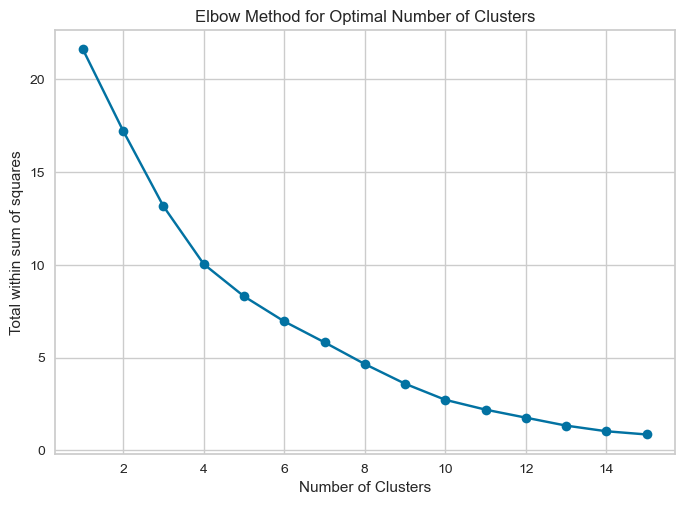

In [112]:
# elbow curve
plt.plot(k_values, wss_values, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Total within sum of squares')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

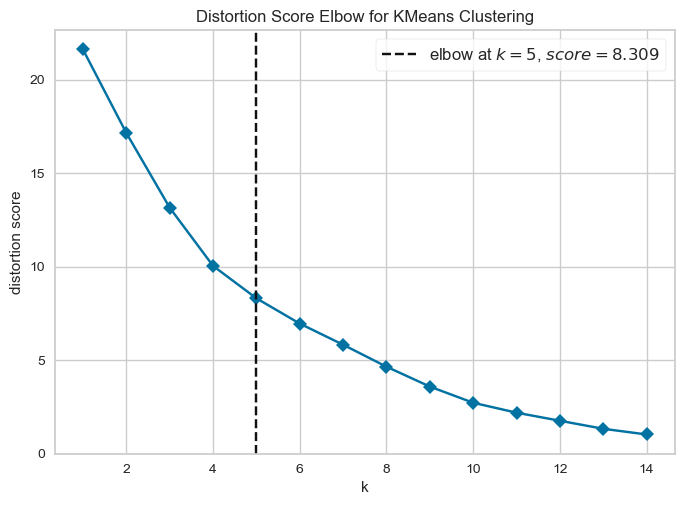

In [113]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

# Normalizing function
def myscale(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

# Apply normalization to numeric columns
numeric_cols = cluster_data.select_dtypes(include=['float64', 'int64']).columns
cluster_data_normalized = cluster_data.copy()
cluster_data_normalized[numeric_cols] = cluster_data[numeric_cols].apply(myscale)

# Set random seed
np.random.seed(123)

# Use the Elbow Method to find the optimal number of clusters
model = KMeans(random_state=123, n_init=100)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=False, metric='distortion')

# Fit the visualizer and display the plot
visualizer.fit(cluster_data_normalized)
visualizer.show()

# Perform K-means clustering with the optimal number of clusters
optimal_clusters = visualizer.elbow_value_
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=123, n_init=100)
km6 = kmeans_model.fit(cluster_data_normalized)

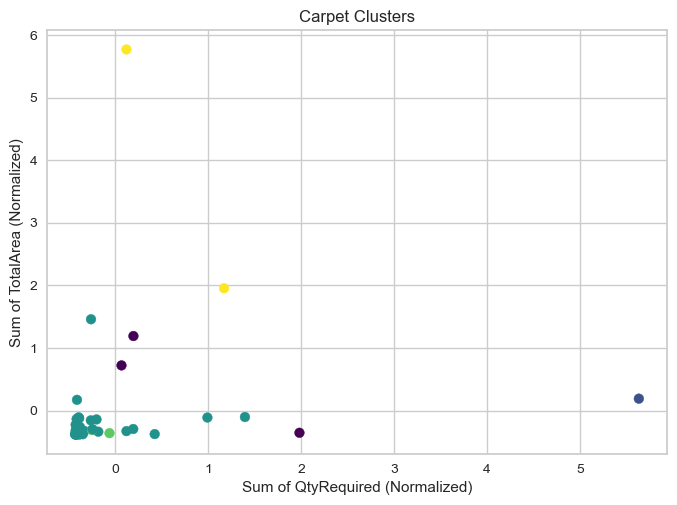

Cluster 0: [2, 29, 43]
Cluster 1: [18]
Cluster 2: [0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 32, 34, 35, 36, 37, 39, 40, 41, 42, 44]
Cluster 3: [33, 38]
Cluster 4: [27, 31]


In [115]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

X = champo_cluster_copy.drop(['Row Labels'], axis=1)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Choose the number of clusters
n_clusters = 5

# Run the K-means algorithm
kmeans = KMeans(n_clusters=n_clusters, random_state=123, n_init=100)
kmeans.fit(X_normalized)

# Create a dictionary to map cluster numbers to customer values
cluster_mapping = {}
for i in range(n_clusters):
    cluster_values = champo_cluster_copy.loc[kmeans.labels_ == i, 'Row Labels'].values
    cluster_mapping[i] = list(cluster_values)

# Visualize the results
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Sum of QtyRequired (Normalized)')
plt.ylabel('Sum of TotalArea (Normalized)')
plt.title('Carpet Clusters')
plt.show()

# Display the actual customer values in each cluster
for cluster_num, customer_values in cluster_mapping.items():
    print(f"Cluster {cluster_num}: {customer_values}")

# Data Recommendation

In [116]:
champo_rec = pd.read_excel('System Analytics Project 1 Data.xlsx', sheet_name=4)

In [117]:
import pandas as pd

file_path = 'System Analytics Project 1 Data.xlsx'
sheet_name = 4

# Specifying the range of rows and columns you want to read
rows_to_read = 21
cols_to_read = 'A:U'

# Read the Excel sheet with the specified range
champo_rec = pd.read_excel(file_path, sheet_name=sheet_name, usecols=cols_to_read, nrows=rows_to_read)

# Display the DataFrame
print(champo_rec)

   Customer   Hand Tufted  Double Wowen   Durry  Double Back  Knotted  \
0        H-2        26612          3000  139618            0        0   
1        P-5         2352          5340   25997         4691     9502   
2        M-1         2697          3085     412         5439     3626   
3        A-9        11716          2116    3585          175      617   
4        C-2         3816         14314   37042            0        0   
5         JL         3544          5110    5310         3575     1026   
6        N-1        60685             0   12203            0        0   
7        T-5         5302          2542   34651          262        0   
8        C-1         4176           220     288            0      453   
9        T-2         2636           762     299         1242        0   
10       I-2         3657          1126     978          410       56   
11        PD            0           191    9950          414      388   
12       L-5            0             0   25840    

In [76]:
import pandas as pd
import numpy as np

# Convert row names to row labels
champo_rec = champo_rec.rename_axis("Customer")

# Convert DataFrame values to numeric (assuming the values are convertible to numeric)
champo_rec = champo_rec.apply(pd.to_numeric, errors='coerce')

# Define cosine similarity function
def get_cosine(x, y):
    cosine = np.sum(x * y) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
    return cosine

# Create a DataFrame to store cosine similarity
cluster_data_similarity = pd.DataFrame(index=champo_rec.columns, columns=champo_rec.columns)

# Fill the DataFrame with cosine similarity values
for i in range(len(champo_rec.columns)):
    for j in range(len(champo_rec.columns)):
        cluster_data_similarity.iloc[i, j] = get_cosine(np.array(champo_rec.iloc[:, i]), np.array(champo_rec.iloc[:, j]))

# Create a DataFrame to store the top 10 neighbors for each column
cluster_data_neighbors = pd.DataFrame(index=champo_rec.columns, columns=range(11))

# Find the top 10 neighbors for each column
for i in range(len(champo_rec.columns)):
    sorted_neighbors = cluster_data_similarity.iloc[:, i].sort_values(ascending=False).head(11).index
    cluster_data_neighbors.iloc[i, :] = sorted_neighbors

# Print the top 10 neighbors for each column
for column in champo_rec.columns:
    result_neighbors = cluster_data_neighbors.loc[column, :].tolist()
    print(f"Top 10 neighbors for {column}: {result_neighbors}")

Top 10 neighbors for Customer : ['Customer ', 'Hand Tufted', 'Double Wowen', 'Durry', 'Double Back', 'Knotted', 'Jacquared', 'Handloom', 'Other', 'Rectangle', 'Square']
Top 10 neighbors for Hand Tufted: ['Hand Tufted', 'BLUE', 'Navy', 'NAVY', 'Rectangle', 'Durry', 'Round', 'Handloom', 'Other', 'Jacquared', 'Double Wowen']
Top 10 neighbors for Double Wowen: ['Double Wowen', 'Rectangle', 'Durry', 'Double Back', 'Gray', 'Knotted', 'Jacquared', 'Square', 'PINK', 'NAVY', 'Navy']
Top 10 neighbors for Durry: ['Durry', 'Rectangle', 'Round', 'Navy', 'NAVY', 'Other', 'Handloom', 'BLUE', 'Jacquared', 'Hand Tufted', 'Double Wowen']
Top 10 neighbors for Double Back: ['Double Back', 'Knotted', 'Square', 'Double Wowen', 'Jacquared', 'Gray', 'Rectangle', 'Purple', 'PINK', 'Handloom', 'BLUE']
Top 10 neighbors for Knotted: ['Knotted', 'Square', 'Double Back', 'Double Wowen', 'Jacquared', 'Rectangle', 'Gray', 'BLUE', 'Durry', 'Handloom', 'PINK']
Top 10 neighbors for Jacquared: ['Jacquared', 'NEUTRAL', 'R

In [79]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Convert row names to row labels
champo_rec = champo_rec.rename_axis("Customer")

# Convert DataFrame values to numeric (assuming the values are convertible to numeric)
champo_rec = champo_rec.apply(pd.to_numeric, errors='coerce')

# Define cosine similarity function
def get_cosine(x, y):
    cosine = np.sum(x * y) / (np.sqrt(np.sum(x**2)) * np.sqrt(np.sum(y**2)))
    return cosine

# Create a DataFrame to store cosine similarity (excluding "Customer" column)
cluster_data_similarity = pd.DataFrame(index=champo_rec.columns[1:], columns=champo_rec.columns[1:])

# Fill the DataFrame with cosine similarity values
for i in range(1, len(champo_rec.columns)):
    for j in range(1, len(champo_rec.columns)):
        cluster_data_similarity.iloc[i-1, j-1] = get_cosine(np.array(champo_rec.iloc[:, i]), np.array(champo_rec.iloc[:, j]))

# Create a DataFrame to store the top 10 neighbors for each column
cluster_data_neighbors = pd.DataFrame(index=champo_rec.columns[1:], columns=range(11))

# Find the top 10 neighbors for each column
for i in range(1, len(champo_rec.columns)):
    sorted_neighbors = cluster_data_similarity.iloc[:, i-1].sort_values(ascending=False).head(11).index
    cluster_data_neighbors.iloc[i-1, :] = sorted_neighbors

# Display the top 10 neighbors for each column in a horizontal table format
for column in champo_rec.columns[1:]:
    result_neighbors = cluster_data_neighbors.loc[column, :].tolist()
    result_df = pd.DataFrame(result_neighbors, columns=[column])
    print(f"Tailored Recommendations for {column}:\n")
    print(tabulate(result_df.T, headers='keys', tablefmt='pipe', showindex=False))
    print("\n")

Tailored Recommendations for Hand Tufted:

| 0           | 1    | 2    | 3    | 4         | 5     | 6     | 7        | 8     | 9         | 10           |
|:------------|:-----|:-----|:-----|:----------|:------|:------|:---------|:------|:----------|:-------------|
| Hand Tufted | BLUE | Navy | NAVY | Rectangle | Durry | Round | Handloom | Other | Jacquared | Double Wowen |


Tailored Recommendations for Double Wowen:

| 0            | 1         | 2     | 3           | 4    | 5       | 6         | 7      | 8    | 9    | 10   |
|:-------------|:----------|:------|:------------|:-----|:--------|:----------|:-------|:-----|:-----|:-----|
| Double Wowen | Rectangle | Durry | Double Back | Gray | Knotted | Jacquared | Square | PINK | NAVY | Navy |


Tailored Recommendations for Durry:

| 0     | 1         | 2     | 3    | 4    | 5     | 6        | 7    | 8         | 9           | 10           |
|:------|:----------|:------|:-----|:-----|:------|:---------|:-----|:----------|:------------|:--